In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from numpy import int64
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler    
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score

## **Merge data** 

In [ ]:
data_bodies = pd.read_csv("train_bodies.csv")

In [ ]:
data_bodies.sample(5)

Body ID                                        articleBody
518       777  Mexican hitmen allegedly killed more than a do...
982      1473  An Iraqi airstrike on Thursday (September 4th)...
938      1405  Mexican authorities have discovered six hidden...
815      1224  ISIS released a video purportedly showing the ...
1464     2206  A "propaganda video" released by ISIS has set ...

In [ ]:
data_stances = pd.read_csv("train_stances.csv")

In [ ]:
data_stances.sample(5)

Headline  Body ID     Stance
46523  Meet the X-BOY: Electric shock turns kid into ...      844  unrelated
38619  Officials shoot down congressman's claims ISIS...      213  unrelated
37696  Airport worker strips naked at security scanne...      989  unrelated
27740  Iraqi Official Dismisses ‘Unfounded’ Reports T...     2025    discuss
17522  Boko Haram denies cease-fire, leader says he m...      244  unrelated

In [ ]:
df = pd.merge(data_stances, data_bodies, on="Body ID", how="left")
df

Headline  Body ID     Stance  \
0      Police find mass graves with at least '15 bodi...      712  unrelated   
1      Hundreds of Palestinians flee floods in Gaza a...      158      agree   
2      Christian Bale passes on role of Steve Jobs, a...      137  unrelated   
3      HBO and Apple in Talks for $15/Month Apple TV ...     1034  unrelated   
4      Spider burrowed through tourist's stomach and ...     1923   disagree   
...                                                  ...      ...        ...   
49967  Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...     1681  unrelated   
49968  Brian Williams slams social media for speculat...     2419  unrelated   
49969  Mexico Says Missing Students Not Found In Firs...     1156      agree   
49970  US Lawmaker: Ten ISIS Fighters Have Been Appre...     1012    discuss   
49971  Shots Heard In Alleged Brown Shooting Recordin...     2044  unrelated   

                                             articleBody  
0      Danny Boyle is directing the untitled film\n\n...  
1      Hundreds of Palestinians were evacuated from t...  
2      30-year-old Moscow resident was hospitalized w...  
3      (Reuters) - A Canadian soldier was shot at the...  
4      Fear not arachnophobes, the story of Bunbury's...  
...                                                  ...  
49967  (CNN) -- Boko Haram laughed off Nigeria's anno...  
49968  Along with unveiling the Apple Watch earlier t...  
49969  The bodies found in a mass grave were confirme...  
49970  Rep. Duncan Hunter (R-CA) told Greta Van Suste...  
49971  A married TV actor who met a young woman and k...  

[49972 rows x 4 columns]

In [ ]:
df.isnull().sum()

Headline       0
Body ID        0
Stance         0
articleBody    0
dtype: int64

In [ ]:
# NLTK for NLP tools such as stemming, lemmatizing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Create new column that shows related as 1 and unrelated as 0
stances = df['Stance']
label1 = pd.DataFrame(stances.map({'unrelated':0 , 'agree':1, 'discuss':1,'disagree':1}))
label1.columns=['target1']
data=pd.concat([df,label1],axis=1)
data

Headline  Body ID     Stance  \
0      Police find mass graves with at least '15 bodi...      712  unrelated   
1      Hundreds of Palestinians flee floods in Gaza a...      158      agree   
2      Christian Bale passes on role of Steve Jobs, a...      137  unrelated   
3      HBO and Apple in Talks for $15/Month Apple TV ...     1034  unrelated   
4      Spider burrowed through tourist's stomach and ...     1923   disagree   
...                                                  ...      ...        ...   
49967  Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...     1681  unrelated   
49968  Brian Williams slams social media for speculat...     2419  unrelated   
49969  Mexico Says Missing Students Not Found In Firs...     1156      agree   
49970  US Lawmaker: Ten ISIS Fighters Have Been Appre...     1012    discuss   
49971  Shots Heard In Alleged Brown Shooting Recordin...     2044  unrelated   

                                             articleBody  target1  
0      Danny Boyle is directing the untitled film\n\n...        0  
1      Hundreds of Palestinians were evacuated from t...        1  
2      30-year-old Moscow resident was hospitalized w...        0  
3      (Reuters) - A Canadian soldier was shot at the...        0  
4      Fear not arachnophobes, the story of Bunbury's...        1  
...                                                  ...      ...  
49967  (CNN) -- Boko Haram laughed off Nigeria's anno...        0  
49968  Along with unveiling the Apple Watch earlier t...        0  
49969  The bodies found in a mass grave were confirme...        1  
49970  Rep. Duncan Hunter (R-CA) told Greta Van Suste...        1  
49971  A married TV actor who met a young woman and k...        0  

[49972 rows x 5 columns]

In [ ]:
stances = df['Stance']
label2 = pd.DataFrame(stances.map({'unrelated':0 , 'agree':1, 'discuss':2,'disagree':3}))
label2.columns=['target2']
datafinal=pd.concat([data,label2],axis=1)
datafinal

Headline  Body ID     Stance  \
0      Police find mass graves with at least '15 bodi...      712  unrelated   
1      Hundreds of Palestinians flee floods in Gaza a...      158      agree   
2      Christian Bale passes on role of Steve Jobs, a...      137  unrelated   
3      HBO and Apple in Talks for $15/Month Apple TV ...     1034  unrelated   
4      Spider burrowed through tourist's stomach and ...     1923   disagree   
...                                                  ...      ...        ...   
49967  Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...     1681  unrelated   
49968  Brian Williams slams social media for speculat...     2419  unrelated   
49969  Mexico Says Missing Students Not Found In Firs...     1156      agree   
49970  US Lawmaker: Ten ISIS Fighters Have Been Appre...     1012    discuss   
49971  Shots Heard In Alleged Brown Shooting Recordin...     2044  unrelated   

                                             articleBody  target1  target2  
0      Danny Boyle is directing the untitled film\n\n...        0        0  
1      Hundreds of Palestinians were evacuated from t...        1        1  
2      30-year-old Moscow resident was hospitalized w...        0        0  
3      (Reuters) - A Canadian soldier was shot at the...        0        0  
4      Fear not arachnophobes, the story of Bunbury's...        1        3  
...                                                  ...      ...      ...  
49967  (CNN) -- Boko Haram laughed off Nigeria's anno...        0        0  
49968  Along with unveiling the Apple Watch earlier t...        0        0  
49969  The bodies found in a mass grave were confirme...        1        1  
49970  Rep. Duncan Hunter (R-CA) told Greta Van Suste...        1        2  
49971  A married TV actor who met a young woman and k...        0        0  

[49972 rows x 6 columns]

In [ ]:
datafinal.rename(columns = {'Headline':'headline', 'articleBody':'body'}, inplace = True)
datafinal

headline  Body ID     Stance  \
0      Police find mass graves with at least '15 bodi...      712  unrelated   
1      Hundreds of Palestinians flee floods in Gaza a...      158      agree   
2      Christian Bale passes on role of Steve Jobs, a...      137  unrelated   
3      HBO and Apple in Talks for $15/Month Apple TV ...     1034  unrelated   
4      Spider burrowed through tourist's stomach and ...     1923   disagree   
...                                                  ...      ...        ...   
49967  Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...     1681  unrelated   
49968  Brian Williams slams social media for speculat...     2419  unrelated   
49969  Mexico Says Missing Students Not Found In Firs...     1156      agree   
49970  US Lawmaker: Ten ISIS Fighters Have Been Appre...     1012    discuss   
49971  Shots Heard In Alleged Brown Shooting Recordin...     2044  unrelated   

                                                    body  target1  target2  
0      Danny Boyle is directing the untitled film\n\n...        0        0  
1      Hundreds of Palestinians were evacuated from t...        1        1  
2      30-year-old Moscow resident was hospitalized w...        0        0  
3      (Reuters) - A Canadian soldier was shot at the...        0        0  
4      Fear not arachnophobes, the story of Bunbury's...        1        3  
...                                                  ...      ...      ...  
49967  (CNN) -- Boko Haram laughed off Nigeria's anno...        0        0  
49968  Along with unveiling the Apple Watch earlier t...        0        0  
49969  The bodies found in a mass grave were confirme...        1        1  
49970  Rep. Duncan Hunter (R-CA) told Greta Van Suste...        1        2  
49971  A married TV actor who met a young woman and k...        0        0  

[49972 rows x 6 columns]

In [ ]:
headline_COLUMN  = 'headline'
body_COLUMN = 'body'
target1_COLUMN = 'target1'
target2_COLUMN = 'target2'

In [ ]:
df_re = datafinal[[headline_COLUMN, body_COLUMN, target1_COLUMN, target2_COLUMN]]
df_re

headline  \
0      Police find mass graves with at least '15 bodi...   
1      Hundreds of Palestinians flee floods in Gaza a...   
2      Christian Bale passes on role of Steve Jobs, a...   
3      HBO and Apple in Talks for $15/Month Apple TV ...   
4      Spider burrowed through tourist's stomach and ...   
...                                                  ...   
49967  Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...   
49968  Brian Williams slams social media for speculat...   
49969  Mexico Says Missing Students Not Found In Firs...   
49970  US Lawmaker: Ten ISIS Fighters Have Been Appre...   
49971  Shots Heard In Alleged Brown Shooting Recordin...   

                                                    body  target1  target2  
0      Danny Boyle is directing the untitled film\n\n...        0        0  
1      Hundreds of Palestinians were evacuated from t...        1        1  
2      30-year-old Moscow resident was hospitalized w...        0        0  
3      (Reuters) - A Canadian soldier was shot at the...        0        0  
4      Fear not arachnophobes, the story of Bunbury's...        1        3  
...                                                  ...      ...      ...  
49967  (CNN) -- Boko Haram laughed off Nigeria's anno...        0        0  
49968  Along with unveiling the Apple Watch earlier t...        0        0  
49969  The bodies found in a mass grave were confirme...        1        1  
49970  Rep. Duncan Hunter (R-CA) told Greta Van Suste...        1        2  
49971  A married TV actor who met a young woman and k...        0        0  

[49972 rows x 4 columns]

In [ ]:
list(df_re.loc[np.random.randint(df_re.shape[0])])

['Catholic Priest Claims God Is Female After Clinically Dead Experience',
 'Apple is hosting its ‘Spring Forward’ event tonight, where it will finally be answering the many questions surrounding the Watch. The Cupertino-based giant however is not resting on its laurels, and is reportedly already working on the next-generation Watch.\n\nAccording to Wall Street Journal, Apple has “studied platinum watch casings,” which could be the material of choice for the luxury edition of the next-generation Watch. For the current Watch, the most expensive variant will boast 18-Karat gold plating. While Apple hasn’t revealed any details about the pricing, reports claim that it could go up to the $20,000 mark.\n\nConsidering that luxury watch makers like Rolex and Omega use platinum for their high-end watches, it seems like a logical step up for Apple as well. But the publication mentions that Apple has only been “studying” the materials, and this is by no means a confirmation about a platinum Watch 

In [ ]:
import re
import string
import os
from collections import defaultdict
from collections import Counter

In [ ]:
#lower all text
#https://stackoverflow.com/questions/22245171/how-to-lowercase-a-pandas-dataframe-string-column-if-it-has-missing-values
df_re= df_re.applymap(lambda s:s.lower() if type(s) == str else s)
df_re

headline  \
0      police find mass graves with at least '15 bodi...   
1      hundreds of palestinians flee floods in gaza a...   
2      christian bale passes on role of steve jobs, a...   
3      hbo and apple in talks for $15/month apple tv ...   
4      spider burrowed through tourist's stomach and ...   
...                                                  ...   
49967  urgent: the leader of isil 'abu bakr al-baghda...   
49968  brian williams slams social media for speculat...   
49969  mexico says missing students not found in firs...   
49970  us lawmaker: ten isis fighters have been appre...   
49971  shots heard in alleged brown shooting recordin...   

                                                    body  target1  target2  
0      danny boyle is directing the untitled film\n\n...        0        0  
1      hundreds of palestinians were evacuated from t...        1        1  
2      30-year-old moscow resident was hospitalized w...        0        0  
3      (reuters) - a canadian soldier was shot at the...        0        0  
4      fear not arachnophobes, the story of bunbury's...        1        3  
...                                                  ...      ...      ...  
49967  (cnn) -- boko haram laughed off nigeria's anno...        0        0  
49968  along with unveiling the apple watch earlier t...        0        0  
49969  the bodies found in a mass grave were confirme...        1        1  
49970  rep. duncan hunter (r-ca) told greta van suste...        1        2  
49971  a married tv actor who met a young woman and k...        0        0  

[49972 rows x 4 columns]

# Word Visualization

## Most common word visualization

In [ ]:
# string into to list
def create_body_corpus(data,target):
    corpus = []
    
    # Take the text field per raw in the target class and split the sentences into words to add to the corpus
    for x in data.loc[df_re['target1'] == target, 'body'].str.split():
        for i in x:
            corpus.append(i)
            
    return corpus

In [ ]:
# string into to list (data=data_df, target)
def create_headline_corpus(data,target):
    corpus = []
    
    # Take the text field per raw in the target class and split the sentences into words to add to the corpus
    for x in data.loc[df_re['target1'] == target, 'headline'].str.split():
        for i in x:
            corpus.append(i)
            
    return corpus

In [ ]:
unrelated_body_corpus = create_body_corpus(df_re, 0)


<BarContainer object of 10 artists>

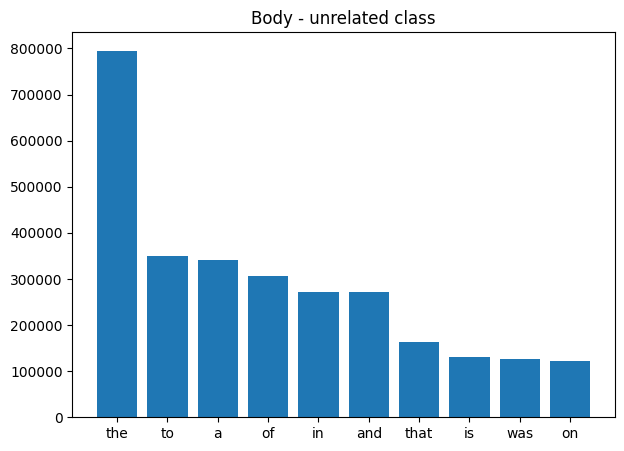

In [ ]:
# (data=data_df, target=0)

# build the corpus for unrelated class(0)
unrelated_body_corpus = create_body_corpus(df_re, 0)

# build a dictionary to associate each word with its count
unrelated_body_dic = defaultdict(int) 

for word in unrelated_body_corpus:
    if word in stop:
        unrelated_body_dic[word] += 1

# sort the words by their counts 
top_n = 10 # the number of top words to plot
top   = sorted(unrelated_body_dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

x, y = zip(*top)
plt.figure(figsize=(7,5))
plt.title('Body - unrelated class')
plt.bar(x, y)

# useless data (because the result word has no context)

In [ ]:
related_body_corpus = create_body_corpus(df_re,1)


<BarContainer object of 10 artists>

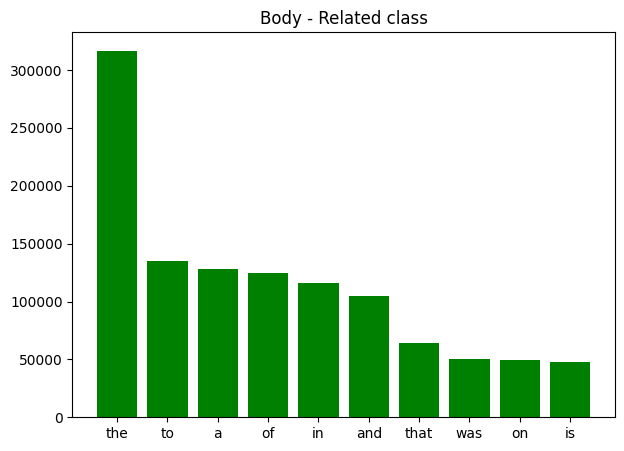

In [ ]:
related_body_corpus = create_body_corpus(df_re,1)

#build a dictionary to associate each word with its count
related_body_dic = defaultdict(int) 

for word in related_body_corpus:
    if word in stop:
        related_body_dic[word] += 1

# sort the words by their counts 
top_n = 10 # the number of top words to plot
top   = sorted(related_body_dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

x, y = zip(*top)
plt.figure(figsize=(7,5))
plt.title('Body - Related class')
plt.bar(x, y,color='g')

# result also not useful

In [ ]:
unrelated_headline_corpus = create_headline_corpus(df_re, 0)


<BarContainer object of 10 artists>

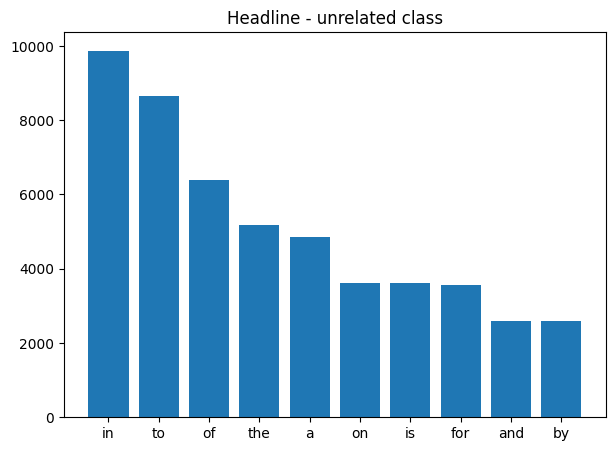

In [ ]:
# (data=df_re, target=0)

# build the corpus for unrelated class(0)
unrelated_headline_corpus = create_headline_corpus(df_re, 0)

# build a dictionary to associate each word with its count
unrelated_headline_dic = defaultdict(int) 

for word in unrelated_headline_corpus:
    if word in stop:
        unrelated_headline_dic[word] += 1

# sort the words by their counts 
top_n = 10 # the number of top words to plot
top   = sorted(unrelated_headline_dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

x, y = zip(*top)
plt.figure(figsize=(7,5))
plt.title('Headline - unrelated class')
plt.bar(x, y)

# useless data (because the result word)

In [ ]:
related_headline_corpus = create_headline_corpus(df_re,1)


<BarContainer object of 10 artists>

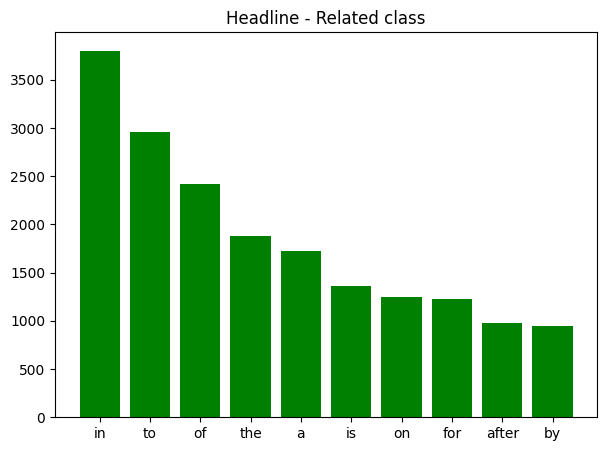

In [ ]:
related_headline_corpus = create_headline_corpus(df_re,1)

#build a dictionary to associate each word with its count
related_headline_dic = defaultdict(int) 

for word in related_headline_corpus:
    if word in stop:
        related_headline_dic[word] += 1

# sort the words by their counts 
top_n = 10 # the number of top words to plot
top   = sorted(related_headline_dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

x, y = zip(*top)
plt.figure(figsize=(7,5))
plt.title('Headline - Related class')
plt.bar(x, y,color='g')

# result also not useful

## Punctuation visualization

In [ ]:
special = [char for char in string.punctuation] # identify punctuation
special_str= string.punctuation

punc_body_unrelated = np.zeros(len(special)) # ex. ! --> 'code!' = 00001

for i in unrelated_body_corpus:
    if i in special:
        punc_body_unrelated[special_str.find(i)] += 1
        
punc_body_related = np.zeros(len(special))

for i in related_body_corpus:
    if i in special:
        punc_body_related[special_str.find(i)] += 1    


Text(0.5, 1.0, 'Body column')

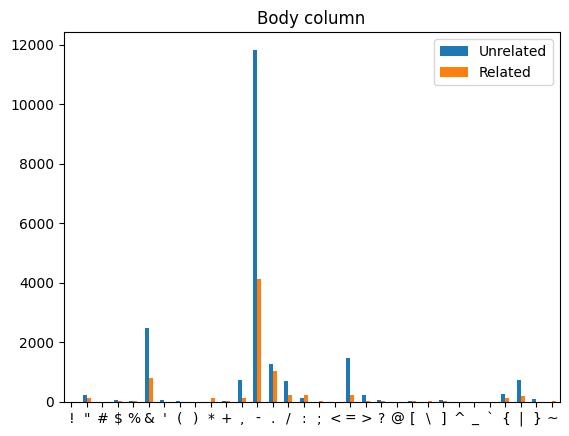

In [ ]:
df = pd.DataFrame({'Unrelated': punc_body_unrelated,
                   'Related': punc_body_related}, index=special)
df.plot.bar(rot=0)
plt.title('Body column')
# Not really useful

In [ ]:
special = [char for char in string.punctuation] # identify punctuation
special_str= string.punctuation

punc_headline_unrelated = np.zeros(len(special)) # ex. ! --> 'code!' = 00001

for i in unrelated_headline_corpus:
    if i in special:
        punc_headline_unrelated[special_str.find(i)] += 1
        
punc_headline_related = np.zeros(len(special))

for i in related_headline_corpus:
    if i in special:
        punc_headline_related[special_str.find(i)] += 1    


Text(0.5, 1.0, 'Headline column')

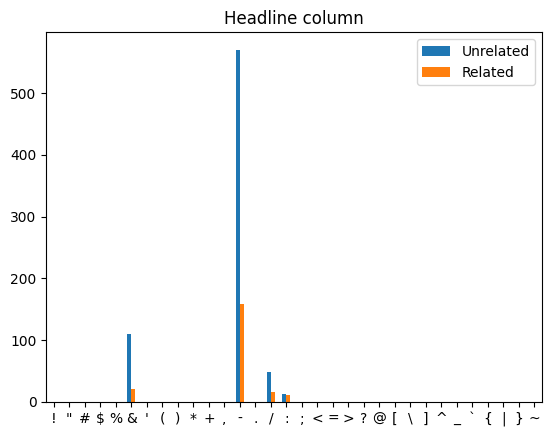

In [ ]:
df = pd.DataFrame({'Unrelated': punc_headline_unrelated,
                   'Related': punc_headline_related}, index=special)
df.plot.bar(rot=0)
plt.title('Headline column')

# Not really useful

In [ ]:
#Almost the same, can delete it

## Most common word after removing stop words

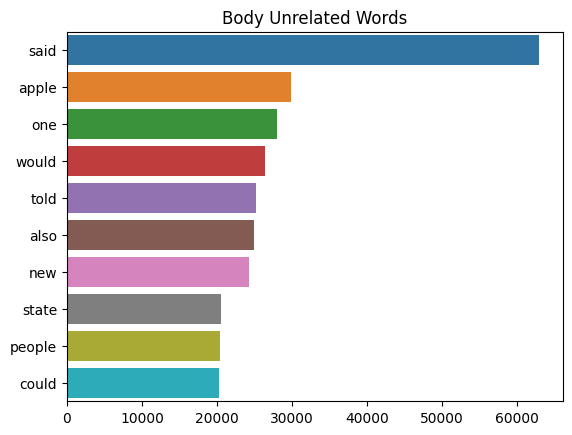

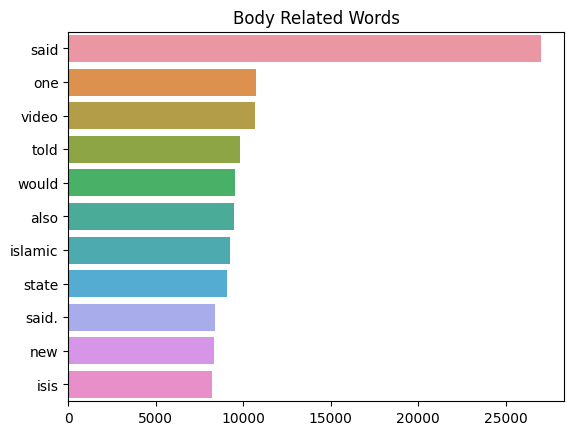

In [ ]:
# Stop word = remove some of the word which is useless (no value) such as the, of, my, that

def plot_most_common_words(corpus, title, n_top=40):
    counter = Counter(corpus)
    most_common = counter.most_common()
    x = []
    y = []

    for word, count in most_common[:n_top]:
        if word not in stop and word not in string.punctuation and len(word)>1:
            x.append(word)
            y.append(count)
        
    sns.barplot(x=y, y=x, orient='h')
    plt.title(title)
    plt.show()
    
plot_most_common_words(unrelated_body_corpus,'Body Unrelated Words', n_top=60) 
plot_most_common_words(related_body_corpus,'Body Related Words', n_top=60)


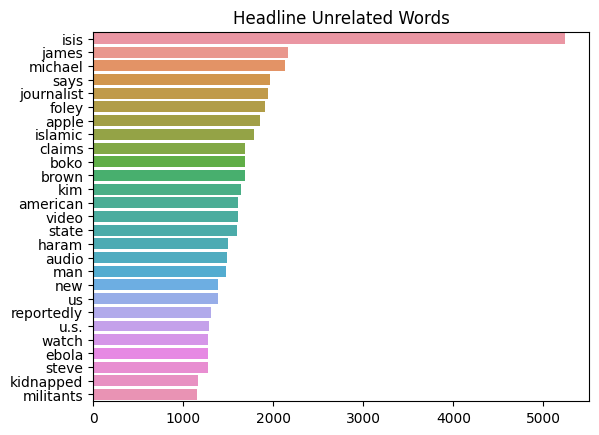

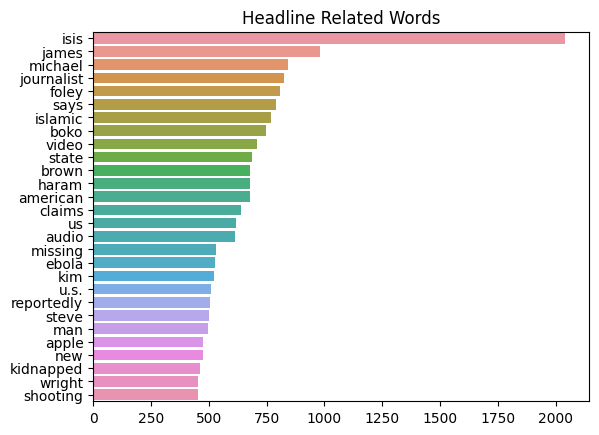

In [ ]:
   
plot_most_common_words(unrelated_headline_corpus,'Headline Unrelated Words', n_top=50) 
plot_most_common_words(related_headline_corpus,'Headline Related Words', n_top=50)


## Bigrams

In [ ]:
# divide into group

def top_pair_bigrams(corpus, n=10):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus) # parameter is set for 2 (bigram)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

Text(0.5, 1.0, 'Biagrams (Body - all data)')

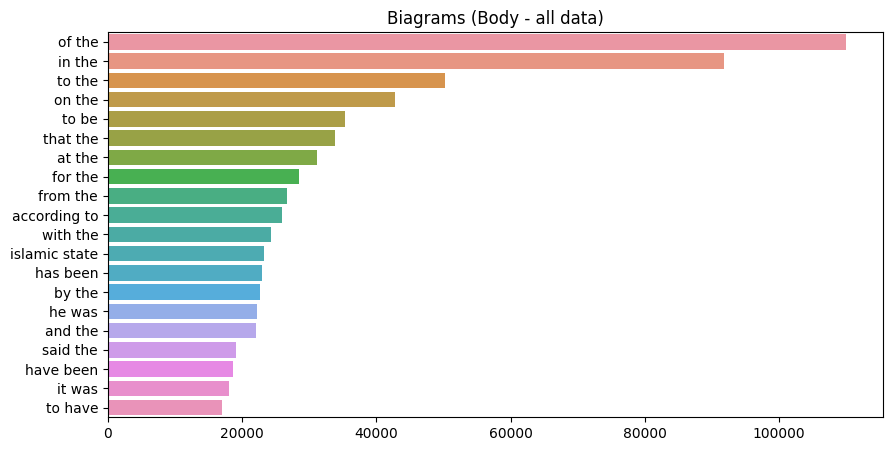

In [ ]:
# First let us check the biagrams of the full dataset
plt.figure(figsize=(10, 5))
pair_bigrams = top_pair_bigrams(df_re['body'],n=20)

y, x = map(list, zip(*pair_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (Body - all data)')

Text(0.5, 1.0, 'Biagrams (Body - unrelated data)')

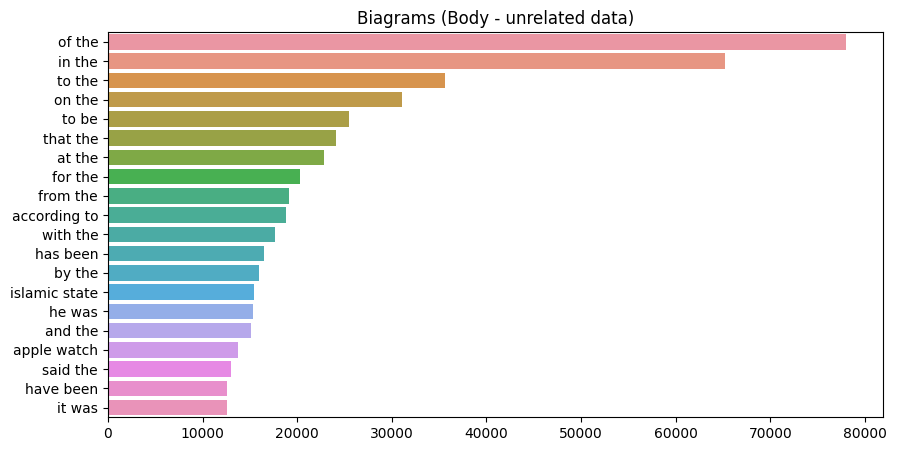

In [ ]:
# Now the biagrams of the Body - unrelated data
plt.figure(figsize=(10, 5))
pair_bigrams = top_pair_bigrams(df_re['body'][df_re['target1']==0],n=20)

y, x = map(list, zip(*pair_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (Body - unrelated data)')

Text(0.5, 1.0, 'Biagrams (Headline - all data)')

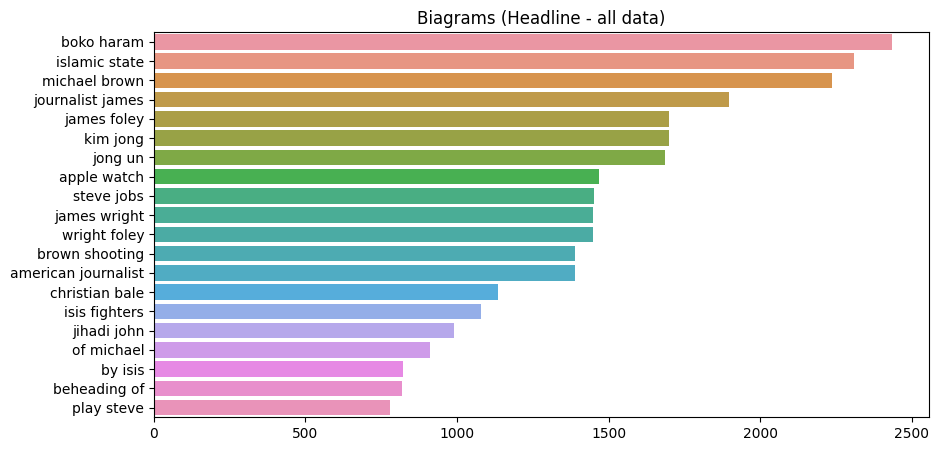

In [ ]:
# First let us check the biagrams of the full dataset
plt.figure(figsize=(10, 5))
pair_bigrams = top_pair_bigrams(df_re['headline'],n=20)

y, x = map(list, zip(*pair_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (Headline - all data)')

Text(0.5, 1.0, 'Biagrams (Body - related data)')

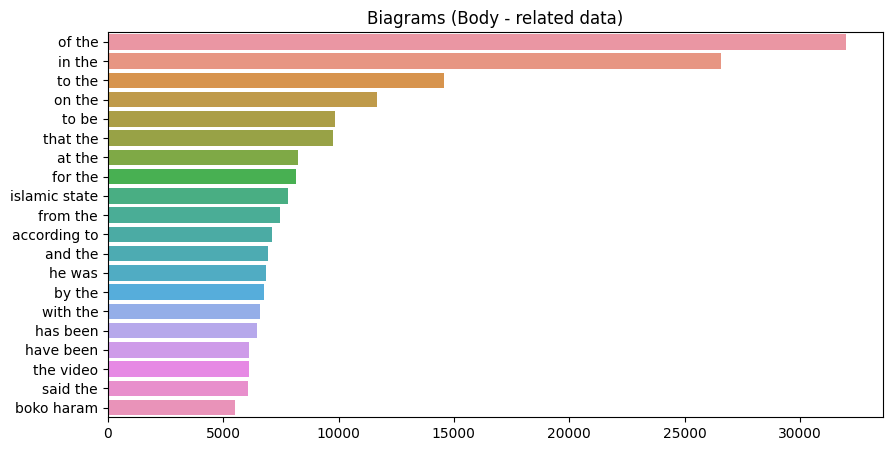

In [ ]:
# Now the biagrams of the Body - related data
plt.figure(figsize=(10, 5))
pair_bigrams = top_pair_bigrams(df_re['body'][df_re['target1']==1],n=20)

y, x = map(list, zip(*pair_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (Body - related data)')

Text(0.5, 1.0, 'Biagrams (Headline - unrelated data)')

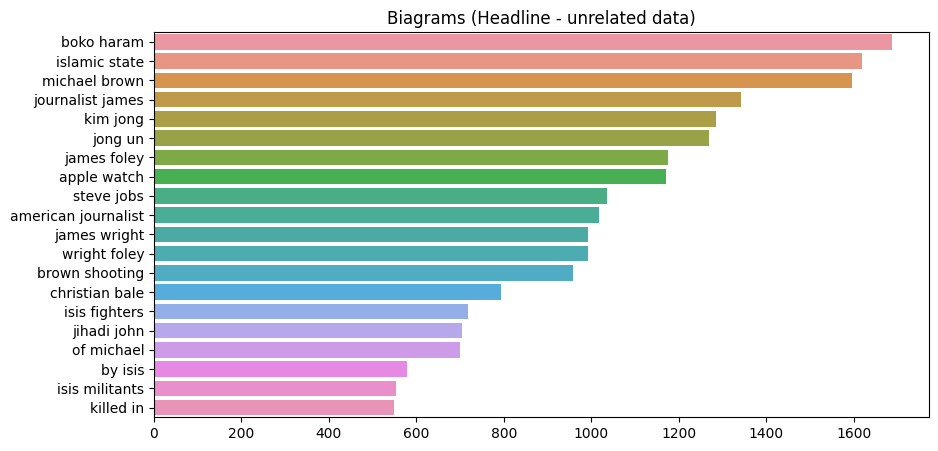

In [ ]:
# Now the biagrams of the Headline - unrelated data
plt.figure(figsize=(10, 5))
pair_bigrams = top_pair_bigrams(df_re['headline'][df_re['target1']==0],n=20)

y, x = map(list, zip(*pair_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (Headline - unrelated data)')

Text(0.5, 1.0, 'Biagrams (Headline - related data)')

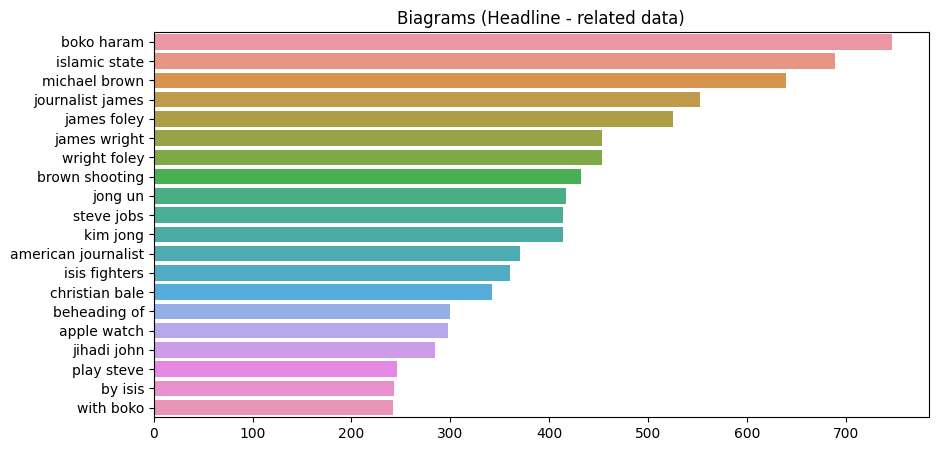

In [ ]:
# Now the biagrams of the headline - related data
plt.figure(figsize=(10, 5))
pair_bigrams = top_pair_bigrams(df_re['headline'][df_re['target1']==1],n=20)

y, x = map(list, zip(*pair_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (Headline - related data)')

In [ ]:




word_count = Counter(" ".join(df_re['body']).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

   Word  Frequency
0   the    1112159
1    to     485459
2     a     468308
3    of     431554
4    in     388665
5   and     375832
6  that     226736
7    is     178231
8   was     176625
9    on     171056


# Clean data

### Remove Punctuation

In [ ]:
# remove punctuation
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [ ]:
df_re['body'] = df_re['body'].apply(lambda x: remove_punct(x))
df_re

headline  \
0      police find mass graves with at least '15 bodi...   
1      hundreds of palestinians flee floods in gaza a...   
2      christian bale passes on role of steve jobs, a...   
3      hbo and apple in talks for $15/month apple tv ...   
4      spider burrowed through tourist's stomach and ...   
...                                                  ...   
49967  urgent: the leader of isil 'abu bakr al-baghda...   
49968  brian williams slams social media for speculat...   
49969  mexico says missing students not found in firs...   
49970  us lawmaker: ten isis fighters have been appre...   
49971  shots heard in alleged brown shooting recordin...   

                                                    body  target1  target2  
0      danny boyle is directing the untitled film\n\n...        0        0  
1      hundreds of palestinians were evacuated from t...        1        1  
2      30yearold moscow resident was hospitalized wit...        0        0  
3      reuters  a canadian soldier was shot at the ca...        0        0  
4      fear not arachnophobes the story of bunburys s...        1        3  
...                                                  ...      ...      ...  
49967  cnn  boko haram laughed off nigerias announcem...        0        0  
49968  along with unveiling the apple watch earlier t...        0        0  
49969  the bodies found in a mass grave were confirme...        1        1  
49970  rep duncan hunter rca told greta van susteren ...        1        2  
49971  a married tv actor who met a young woman and k...        0        0  

[49972 rows x 4 columns]

In [ ]:
df_re['headline'] = df_re['headline'].apply(lambda x: remove_punct(x))
df_re

headline  \
0      police find mass graves with at least 15 bodie...   
1      hundreds of palestinians flee floods in gaza a...   
2      christian bale passes on role of steve jobs ac...   
3      hbo and apple in talks for 15month apple tv st...   
4      spider burrowed through tourists stomach and u...   
...                                                  ...   
49967  urgent the leader of isil abu bakr albaghdadi ...   
49968  brian williams slams social media for speculat...   
49969  mexico says missing students not found in firs...   
49970  us lawmaker ten isis fighters have been appreh...   
49971  shots heard in alleged brown shooting recordin...   

                                                    body  target1  target2  
0      danny boyle is directing the untitled film\n\n...        0        0  
1      hundreds of palestinians were evacuated from t...        1        1  
2      30yearold moscow resident was hospitalized wit...        0        0  
3      reuters  a canadian soldier was shot at the ca...        0        0  
4      fear not arachnophobes the story of bunburys s...        1        3  
...                                                  ...      ...      ...  
49967  cnn  boko haram laughed off nigerias announcem...        0        0  
49968  along with unveiling the apple watch earlier t...        0        0  
49969  the bodies found in a mass grave were confirme...        1        1  
49970  rep duncan hunter rca told greta van susteren ...        1        2  
49971  a married tv actor who met a young woman and k...        0        0  

[49972 rows x 4 columns]

In [ ]:
list(df_re.loc[np.random.randint(df_re.shape[0])])

['managua explosion not a meteorite nasa suggests',
 'a disturbing video posted online appears to show the beheading of american journalist james foley who was kidnapped while covering the syrian conflict in 2012\n\nin the video a man who appears to be foley dressed in orange kneels beside an armed man clad in black foley delivers a statement condemning us action in iraq and says that the us government is his “real killers”\n\n“for what will happen to me is only a result of their complacency and criminality” foley says in halting speech “i wish i had more time i wish i could have the hope of freedom of seeing my family once again but that ship has sailed i guess all in all i wish i wasn’t american”\n\nseconds later the figure dressed in black brandishes a knife and identifies himself as with the islamic state the name the brutal terror group islamic state of iraq and syria took on after its leader abu bakr albaghdadi declared himself the leader of all muslims\n\n“today your military ai

In [ ]:
print(df_re)

                                                headline  \
0      police find mass graves with at least 15 bodie...   
1      hundreds of palestinians flee floods in gaza a...   
2      christian bale passes on role of steve jobs ac...   
3      hbo and apple in talks for 15month apple tv st...   
4      spider burrowed through tourists stomach and u...   
...                                                  ...   
49967  urgent the leader of isil abu bakr albaghdadi ...   
49968  brian williams slams social media for speculat...   
49969  mexico says missing students not found in firs...   
49970  us lawmaker ten isis fighters have been appreh...   
49971  shots heard in alleged brown shooting recordin...   

                                                    body  target1  target2  
0      danny boyle is directing the untitled film\n\n...        0        0  
1      hundreds of palestinians were evacuated from t...        1        1  
2      30yearold moscow resident was hospitalize

### Remove stop word

In [ ]:
#https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
df_re['body'] = df_re['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_re['headline'] = df_re['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_re

headline  \
0      police find mass graves least 15 bodies near m...   
1      hundreds palestinians flee floods gaza israel ...   
2      christian bale passes role steve jobs actor re...   
3      hbo apple talks 15month apple tv streaming ser...   
4                 spider burrowed tourists stomach chest   
...                                                  ...   
49967  urgent leader isil abu bakr albaghdadi killed ...   
49968  brian williams slams social media speculation ...   
49969  mexico says missing students found first mass ...   
49970  us lawmaker ten isis fighters apprehended comi...   
49971  shots heard alleged brown shooting recording a...   

                                                    body  target1  target2  
0      danny boyle directing untitled film seth rogen...        0        0  
1      hundreds palestinians evacuated homes sunday m...        1        1  
2      30yearold moscow resident hospitalized wounds ...        0        0  
3      reuters canadian soldier shot canadian war mem...        0        0  
4      fear arachnophobes story bunburys spiderman mi...        1        3  
...                                                  ...      ...      ...  
49967  cnn boko haram laughed nigerias announcement c...        0        0  
49968  along unveiling apple watch earlier year compa...        0        0  
49969  bodies found mass grave confirmed missing stud...        1        1  
49970  rep duncan hunter rca told greta van susteren ...        1        2  
49971  married tv actor met young woman kissed sauna ...        0        0  

[49972 rows x 4 columns]

### Lemmatization

In [ ]:
list(df_re.loc[np.random.randint(df_re.shape[0])])

['kim jong un hospitalized two broken ankles reportedly wearing heels overweight',
 'wasn’t “discomfort” that’s troubling north korean dictator kim jongun kim treated hospital become fat ankles fractured weight according report telegraph attributed south korea’s chosun ilbo newspaper portly 31yearold absolute ruler undergo operation putting much strain ankles grueling round official engagements report said kim 5foot9 believed ballooned 280 pounds apparently due unhealthy diet that’s said include imported swiss cheese heavy drinking bodyguards said posted around ward pyongyang hospital he’s treated days ago north korea admitted kim suffering “discomfort” amid speculation gout',
 1,
 2]

In [ ]:
text = df_re.body.unique()[1:]
text = list(map(lambda x: x.replace('%20', ' '), text))

wnl = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    sentence_words = sentence.split(' ')
    new_sentence_words = list()
    
    for sentence_word in sentence_words:
        sentence_word = sentence_word.replace('#', '')
        new_sentence_word = wnl.lemmatize(sentence_word.lower(), wordnet.VERB)
        new_sentence_words.append(new_sentence_word)
        
    new_sentence = ' '.join(new_sentence_words)
    new_sentence = new_sentence.strip()
    
    return new_sentence

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_re['body'] = df_re['body'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
text = df_re.headline.unique()[1:]
text = list(map(lambda x: x.replace('%20', ' '), text))

df_re['headline'] = df_re['headline'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
# select a random sample
list(df_re.loc[np.random.randint(df_re.shape[0])])

['expensive apple watch probably cost around 10000',
 'weeks edition lie fake prank cheat internet bring spraypainted penis expensive car seriously begin picture poorly draw penis hood 25 million bugatti veyron appear reddit image imgur automotive blog car crush point artwork likely do plan prank video instagram user andreysmygov post photo elementarylevel nsfw draw caption often get spray paint bugatti lol credit twinztv youtube channel crew also post photos vehicle mention prank proof load often u get spray paint bugatti lol shoutout homie vgtorious let us twinztv1 twinztv2 twinztv nigxl alexwood66 view instagram load get spray paint vgtorious buggati today haha prank twinztv youtube funny seattle twinztv twinztv2 andreysmygov view instagram owner vehicle appear instagram user gtorious post another photo expensive car last night caption oops think prank world video hasnt airedyet image vgtorious instagram august twinztv crew post another prank video use vehicle believe nothing intern

In [ ]:
#https://codereview.stackexchange.com/questions/249329/finding-the-most-frequent-words-in-pandas-dataframe
#Ref: Count the most frequence word to see whether lematization and removing stopword working or not
word_count = Counter(" ".join(df_re['body']).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

     Word  Frequency
0     say     174367
1  report      67539
2   state      43894
3    tell      41964
4     one      41371
5      us      39157
6   video      37099
7   apple      36673
8   would      36102
9    time      35997


In [ ]:
word_count = Counter(" ".join(df_re['headline']).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

     Word  Frequency
0    isis       7666
1     say       4150
2  report       4001
3      us       3871
4  behead       3701
5   claim       3599
6   shoot       3254
7   foley       3222
8     jam       3147
9   video       3077


In [ ]:
df_re

headline  \
0      police find mass grave least 15 body near mexi...   
1      hundreds palestinians flee flood gaza israel o...   
2      christian bale pass role steve job actor repor...   
3      hbo apple talk 15month apple tv stream service...   
4                   spider burrow tourists stomach chest   
...                                                  ...   
49967  urgent leader isil abu bakr albaghdadi kill photo   
49968  brian williams slam social media speculation w...   
49969     mexico say miss students find first mass grave   
49970  us lawmaker ten isis fighters apprehend come a...   
49971         shots hear allege brown shoot record audio   

                                                    body  target1  target2  
0      danny boyle direct untitled film seth rogen ey...        0        0  
1      hundreds palestinians evacuate home sunday mor...        1        1  
2      30yearold moscow resident hospitalize wound in...        0        0  
3      reuters canadian soldier shoot canadian war me...        0        0  
4      fear arachnophobes story bunburys spiderman mi...        1        3  
...                                                  ...      ...      ...  
49967  cnn boko haram laugh nigerias announcement cea...        0        0  
49968  along unveil apple watch earlier year company ...        0        0  
49969         body find mass grave confirm miss students        1        1  
49970  rep duncan hunter rca tell greta van susteren ...        1        2  
49971  marry tv actor meet young woman kiss sauna wak...        0        0  

[49972 rows x 4 columns]

# Split data

In [ ]:
df_re.isnull().sum()

headline    0
body        0
target1     0
target2     0
dtype: int64

In [ ]:
datapoints = df_re.drop(["target1","target2"], axis=1)
labels = np.array(df_re["target1"])

In [ ]:
datapoints

headline  \
0      police find mass grave least 15 body near mexi...   
1      hundreds palestinians flee flood gaza israel o...   
2      christian bale pass role steve job actor repor...   
3      hbo apple talk 15month apple tv stream service...   
4                   spider burrow tourists stomach chest   
...                                                  ...   
49967  urgent leader isil abu bakr albaghdadi kill photo   
49968  brian williams slam social media speculation w...   
49969     mexico say miss students find first mass grave   
49970  us lawmaker ten isis fighters apprehend come a...   
49971         shots hear allege brown shoot record audio   

                                                    body  
0      danny boyle direct untitled film seth rogen ey...  
1      hundreds palestinians evacuate home sunday mor...  
2      30yearold moscow resident hospitalize wound in...  
3      reuters canadian soldier shoot canadian war me...  
4      fear arachnophobes story bunburys spiderman mi...  
...                                                  ...  
49967  cnn boko haram laugh nigerias announcement cea...  
49968  along unveil apple watch earlier year company ...  
49969         body find mass grave confirm miss students  
49970  rep duncan hunter rca tell greta van susteren ...  
49971  marry tv actor meet young woman kiss sauna wak...  

[49972 rows x 2 columns]

In [ ]:
# Split the data into training and validation sets 60:20:20
X_train, X_val, y_train, y_val = train_test_split(datapoints, labels, test_size=0.30, random_state=42)

In [ ]:
print('Size of training set:',X_train.shape)
print('Size of validation set:',X_val.shape)

Size of training set: (34980, 2)
Size of validation set: (14992, 2)


# **Undersampling**

[Text(0, 0, '0'), Text(1, 0, '1')]

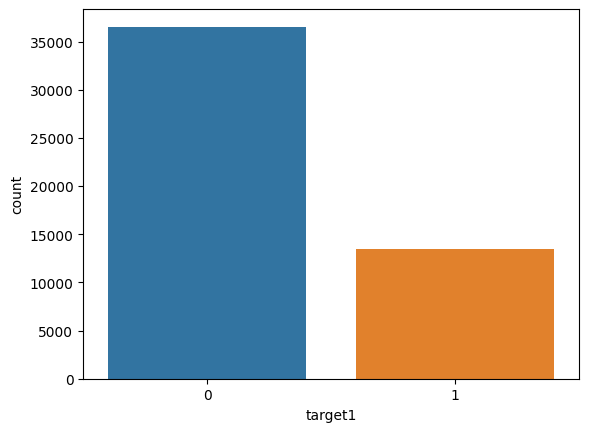

In [ ]:
# Checking the imbalance data
target1_count=sns.countplot(data=df_re,x='target1')
target1_count.set_xticklabels(['0','1'])

In [ ]:
df_training = pd.DataFrame(X_train)
df_training["target1"] = y_train
df_unrelated = df_training[df_training["target1"] == 0]
df_related = df_training[df_training["target1"] == 1]
df_unrelated

headline  \
34981  meteorite leave crater nicaraguan capital managua   
25281                   sun baby ‘teletubbies’ look like   
7980   seven high school girls get pregnant fiveday s...   
31462  fear journalist jam wright foley behead islami...   
23791  dhs gop rep’s claim isis members catch us bord...   
...                                                  ...   
6265       christian bale play steve job upcoming biopic   
11284            boko haram deny nigeria ceasefire claim   
38158          sorry fido pope francis say pet go heaven   
860    kim jongun’s sister power behind north korean ...   
15795                  teen make 72 million stock market   

                                                    body  target1  
34981  islamic state militants release video purporte...        0  
25281  man dump girlfriend tell good bed chop penis t...        0  
7980   isis leader abu bakr albaghdadi reportedly kil...        0  
31462  former lapd officer david klinger cnn law enfo...        0  
23791  although majority austrian resort suffer lack ...        0  
...                                                  ...      ...  
6265   although canadian police release name ottawa s...        0  
11284  jose canseco injure accidental shoot home 8 ne...        0  
38158  youre already use ios 8s icloud drive feature ...        0  
860    arrive convent macerata june last year religio...        0  
15795  it’s clear exactly waterproof apple watch peop...        0  

[25625 rows x 3 columns]

In [ ]:
df_related

headline  \
41776  isis blast scorpion bomb civilian areas iraq m...   
31061  reveal woman behind 5 million per year youtube...   
27642     priest die 48 minutes say meet god she’s woman   
26216  bugatti veyron vandalize penis graffiti viral ...   
25927  rumor debunk robocopstyle robots patrol micros...   
...                                                  ...   
37819             news sit fall putin birddropping video   
47191  jeh johnson shoot duncan hunters assertion ent...   
21962       eyewitness say viral video homeless man stag   
16850   6 hide mass grave may hold miss mexican students   
44732  dna test prove lebanon hold isis chief albaghd...   

                                                    body  target1  
41776  sis develop new weapon iraq design strike fear...        1  
31061  identity couple behind megasuccessful dc toy c...        1  
27642  catholic priest masschussetts report dead clos...        1  
26216  see bugatti veyron vandalize penis graffiti se...        1  
25927  seem like robots everywhere days they’re roll ...        1  
...                                                  ...      ...  
37819  video appear show bird pooping russian preside...        1  
47191  rep duncan hunter rcalif claim tuesday least 1...        1  
21962  youtube prankster josh paler lin decide give m...        1  
16850  police mexico find mass grave contain least 15...        1  
44732  beirut — lebanon’s military detain wife child ...        1  

[9355 rows x 3 columns]

In [ ]:
from sklearn.utils import resample

df_unrelated = resample(df_unrelated,random_state=42,n_samples=9355)
df_unrelated

headline  \
20714  planetary alignment jan 4 2015 decrease gravit...   
46817  jam foley american journalist jam wright foley...   
31408              lebanon confirm hold isis chief’s kin   
19640  jam wright foley kidnap journalist apparently ...   
24042  apple watch users need recharge nightly compan...   
...                                                  ...   
41505          ypg confirm gill rosenberg capture kobani   
48713  eat ceilings pooped keyboards rat take vogues ...   
42765         durex rumor ‘pumpkin spice’ condom comment   
12397          isil behead american photojournalist iraq   
9491           found fathersera time capsule find boston   

                                                    body  target1  
20714  cheeseloving tyrant last see public september ...        0  
46817  upcoming steve job biopic likely find actor pl...        0  
31408  trip bali turn dylan thomas reallife spiderman...        0  
19640  judd nelson rebuff internet rumor die drug ove...        0  
24042  celebrity dog cesar millan die accord post sit...        0  
...                                                  ...      ...  
41505  welsh actor christian bale withdraw role steve...        0  
48713  twitter user name cassy deliver ultimate fck c...        0  
42765  amazon boss jeff bezos prim ready fresh assaul...        0  
12397  south american nun suddenly start experience s...        0  
9491   jam wright foley american journalist kidnap 20...        0  

[9355 rows x 3 columns]

In [ ]:
df_newsample = pd.concat([df_unrelated,df_related])
df_newsample

headline  \
20714  planetary alignment jan 4 2015 decrease gravit...   
46817  jam foley american journalist jam wright foley...   
31408              lebanon confirm hold isis chief’s kin   
19640  jam wright foley kidnap journalist apparently ...   
24042  apple watch users need recharge nightly compan...   
...                                                  ...   
37819             news sit fall putin birddropping video   
47191  jeh johnson shoot duncan hunters assertion ent...   
21962       eyewitness say viral video homeless man stag   
16850   6 hide mass grave may hold miss mexican students   
44732  dna test prove lebanon hold isis chief albaghd...   

                                                    body  target1  
20714  cheeseloving tyrant last see public september ...        0  
46817  upcoming steve job biopic likely find actor pl...        0  
31408  trip bali turn dylan thomas reallife spiderman...        0  
19640  judd nelson rebuff internet rumor die drug ove...        0  
24042  celebrity dog cesar millan die accord post sit...        0  
...                                                  ...      ...  
37819  video appear show bird pooping russian preside...        1  
47191  rep duncan hunter rcalif claim tuesday least 1...        1  
21962  youtube prankster josh paler lin decide give m...        1  
16850  police mexico find mass grave contain least 15...        1  
44732  beirut — lebanon’s military detain wife child ...        1  

[18710 rows x 3 columns]

In [ ]:
labels_train = np.array(df_newsample["target1"])
data_train = df_newsample.drop(["target1"], axis=1)
data_train

headline  \
20714  planetary alignment jan 4 2015 decrease gravit...   
46817  jam foley american journalist jam wright foley...   
31408              lebanon confirm hold isis chief’s kin   
19640  jam wright foley kidnap journalist apparently ...   
24042  apple watch users need recharge nightly compan...   
...                                                  ...   
37819             news sit fall putin birddropping video   
47191  jeh johnson shoot duncan hunters assertion ent...   
21962       eyewitness say viral video homeless man stag   
16850   6 hide mass grave may hold miss mexican students   
44732  dna test prove lebanon hold isis chief albaghd...   

                                                    body  
20714  cheeseloving tyrant last see public september ...  
46817  upcoming steve job biopic likely find actor pl...  
31408  trip bali turn dylan thomas reallife spiderman...  
19640  judd nelson rebuff internet rumor die drug ove...  
24042  celebrity dog cesar millan die accord post sit...  
...                                                  ...  
37819  video appear show bird pooping russian preside...  
47191  rep duncan hunter rcalif claim tuesday least 1...  
21962  youtube prankster josh paler lin decide give m...  
16850  police mexico find mass grave contain least 15...  
44732  beirut — lebanon’s military detain wife child ...  

[18710 rows x 2 columns]

In [ ]:
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
from sklearn.utils import shuffle
df_shuffle = shuffle(df_newsample)

In [ ]:
df_shuffle

headline  \
22720  apple watch developers tell limit feature save...   
9277   kidnap nigerian schoolgirls government claim c...   
4298   audio record michael brown shoot reportedly su...   
10866                         truly horrify story spider   
7552   macaulay culkin dead hoax fake death report sp...   
...                                                  ...   
12768  see homeless man spend hundred dollars keep ti...   
1333                            vogue vs rat war rat win   
45183                                          miss plan   
5903   seth rogen star steve wozniak sonys steve job ...   
42207  us airstrike kill islamic al shabab terrorist ...   

                                                    body  target1  
22720  apple release first iphone come apples preload...        1  
9277   “star war force awakens” one highly anticipate...        0  
4298   video texting service glide verify record play...        1  
10866  small town purdon texas quarantine family five...        0  
7552   video post isil terrorists iraq purport show b...        0  
...                                                  ...      ...  
12768  sister britishborn american photojournalist lu...        0  
1333   case miss vogue magazine one glamorous institu...        1  
45183  several iraqi news source include al sabah web...        0  
5903   aaron sorkins upcoming film former apple ceo s...        1  
42207  us assess whether airstrike encampment somalia...        1  

[18710 rows x 3 columns]

In [ ]:
labels_shuffle_train = np.array(df_shuffle["target1"])
data_shuffle_train = df_shuffle.drop(["target1"], axis=1)
data_shuffle_train

headline  \
22720  apple watch developers tell limit feature save...   
9277   kidnap nigerian schoolgirls government claim c...   
4298   audio record michael brown shoot reportedly su...   
10866                         truly horrify story spider   
7552   macaulay culkin dead hoax fake death report sp...   
...                                                  ...   
12768  see homeless man spend hundred dollars keep ti...   
1333                            vogue vs rat war rat win   
45183                                          miss plan   
5903   seth rogen star steve wozniak sonys steve job ...   
42207  us airstrike kill islamic al shabab terrorist ...   

                                                    body  
22720  apple release first iphone come apples preload...  
9277   “star war force awakens” one highly anticipate...  
4298   video texting service glide verify record play...  
10866  small town purdon texas quarantine family five...  
7552   video post isil terrorists iraq purport show b...  
...                                                  ...  
12768  sister britishborn american photojournalist lu...  
1333   case miss vogue magazine one glamorous institu...  
45183  several iraqi news source include al sabah web...  
5903   aaron sorkins upcoming film former apple ceo s...  
42207  us assess whether airstrike encampment somalia...  

[18710 rows x 2 columns]

# Related and unrelated Classification

### Feature Extraction: TF-IDF

In [ ]:
# https://stackoverflow.com/questions/36731813/computing-separate-tfidf-scores-for-two-different-columns-using-sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

transformer = FeatureUnion([
                ('articleBody_tfidf', 
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['body'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())])),
                ('Headline_tfidf', 
                  Pipeline([('extract_field', 
                              FunctionTransformer(lambda x: x['headline'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())]))]) 

transformer.fit(data_train)
                
train = transformer.transform(data_train)

val = transformer.transform(X_val)

# test = transformer.transform(X_test)

In [ ]:
print('Train size: ', train.shape)
print('Validation size: ', val.shape)
# print('Test size: ', test.shape)


Train size:  (18710, 24530)
Validation size:  (14992, 24530)


### ML: Naive Bayes

In [ ]:
# create the model, train it on the train dataset and print the scores
NB_TFIDF_model = MultinomialNB() # as implemented in sklearn
NB_TFIDF_model.fit(train,labels_train)
print("Train score:", NB_TFIDF_model.score(train, labels_train))
print("Validation score:", NB_TFIDF_model.score(val, y_val))

Train score: 0.7199893105291288
Validation score: 0.687299893276414


In [ ]:
# Create the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    ''' Plot the confusion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confusion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

    # Plot the confusion matrix
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True,fmt='.0f',cmap="YlGnBu",annot_kws={"size": 10}) # font size
    plt.show()

In [ ]:
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(121)
    ax.set_aspect(1)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

              precision    recall  f1-score   support

           0       0.86      0.68      0.76     10920
           1       0.45      0.70      0.55      4072

    accuracy                           0.69     14992
   macro avg       0.66      0.69      0.65     14992
weighted avg       0.75      0.69      0.70     14992



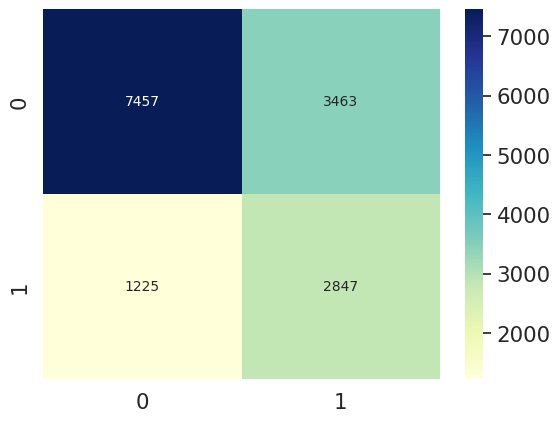

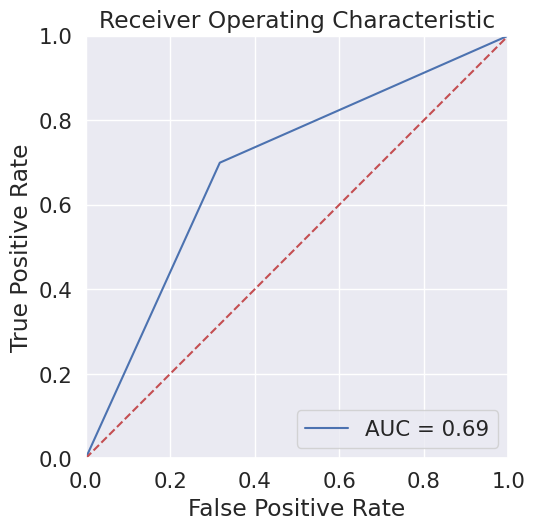

In [ ]:
# Predicting the Test set results
y_pred = NB_TFIDF_model.predict(val)

#print the classification report to highlight the accuracy with f1-score, precision and recall
print(metrics.classification_report(y_val, y_pred))
plot_confusion_matrix(y_val, y_pred)
plot_roc_curve(y_val, y_pred)


### ML: SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters to tune
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']
}
# Tune hyperparameters  using Grid Search and a SVM model
SVM_TFIDF_model = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, n_jobs=-1).fit(train, labels_train)

In [ ]:
print("Train score:", SVM_TFIDF_model.score(train, labels_train))
print("Validation score:", SVM_TFIDF_model.score(val, y_val))

Train score: 1.0
Validation score: 0.9880602988260405


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10920
           1       0.97      0.99      0.98      4072

    accuracy                           0.99     14992
   macro avg       0.98      0.99      0.99     14992
weighted avg       0.99      0.99      0.99     14992



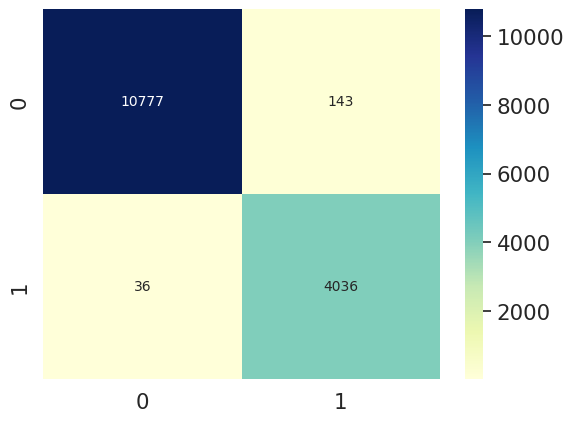

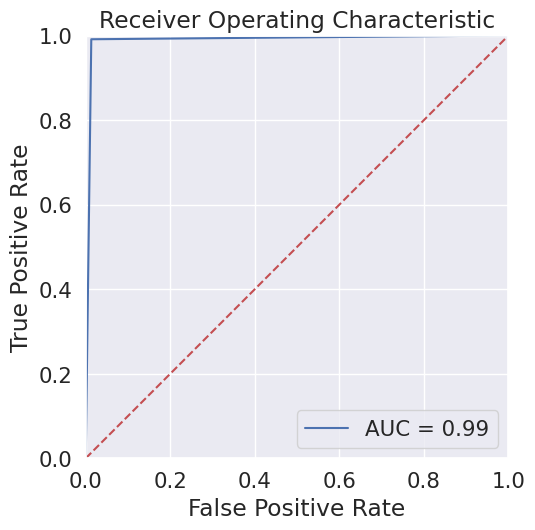

In [ ]:
# Predicting the validation set 
y_pred = SVM_TFIDF_model.predict(val)

print(metrics.classification_report(y_val, y_pred))
plot_confusion_matrix(y_val, y_pred)
plot_roc_curve(y_val, y_pred)

### ML: Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
decisiontree = DecisionTreeClassifier()
randomforest = BaggingClassifier(decisiontree, n_estimators=100, max_samples=0.8, random_state=1)

In [ ]:
randomforest.fit(train, labels_train)
print("Train score:", randomforest.score(train, labels_train))
print("Validation score:", randomforest.score(val, y_val))

Train score: 0.9997327632282202
Validation score: 0.9447705442902882


              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10920
           1       0.86      0.95      0.90      4072

    accuracy                           0.94     14992
   macro avg       0.92      0.94      0.93     14992
weighted avg       0.95      0.94      0.95     14992



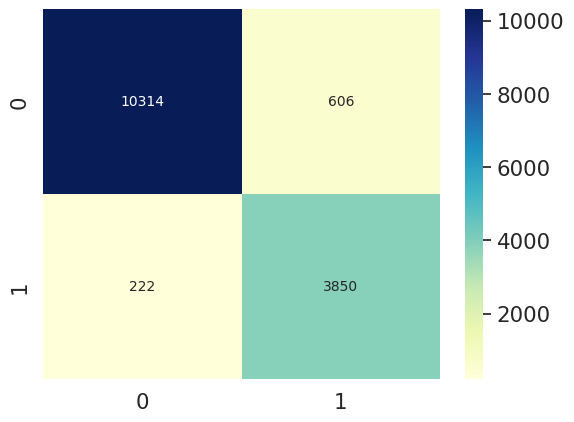

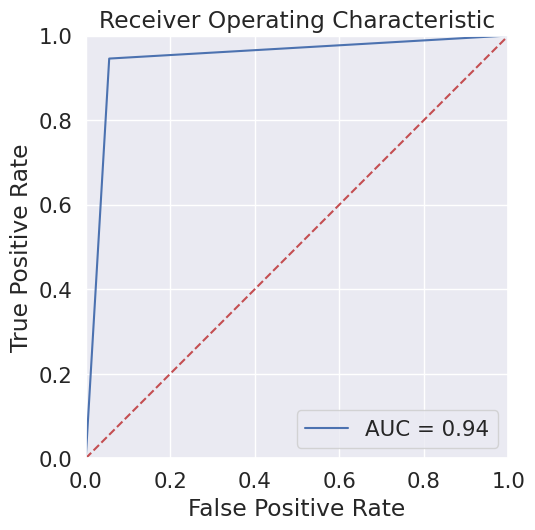

In [ ]:
# Predicting the Test set results
y_pred_randomforest = randomforest.predict(val)

#print the classification report to highlight the accuracy with f1-score, precision and recall
print(metrics.classification_report(y_val, y_pred_randomforest))
plot_confusion_matrix(y_val, y_pred_randomforest)
plot_roc_curve(y_val, y_pred_randomforest)

### DL:LSTM

Prepare data for LSTM

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
# define the function to clean more on the data
def tokenizing(text):
    numbers = re.compile(r'\d+')
    text = numbers.sub('', text)
    words = word_tokenize(text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
data_shuffle_train_LSTM = data_shuffle_train[['headline', 'body']]
data_shuffle_train_LSTM = data_shuffle_train_LSTM[['headline', 'body']].apply(lambda x: x.apply(tokenizing))
data_shuffle_test_LSTM = X_val[['headline', 'body']] 
data_shuffle_test_LSTM[['headline', 'body']] = data_shuffle_test_LSTM[['headline', 'body']].apply(lambda x: x.apply(tokenizing))

In [ ]:
#Vectorize training and testing dataset
tfidf = TfidfVectorizer(decode_error='ignore', lowercase= False, min_df=0.001) 
data_shuffle_train_LSTM = tfidf.fit_transform(data_shuffle_train_LSTM['headline'].astype('U') + ' ' + data_shuffle_train_LSTM['body'].astype('U'))
data_shuffle_test_LSTM = tfidf.transform(data_shuffle_test_LSTM['headline'].astype('U') + ' ' + data_shuffle_test_LSTM['body'].astype('U'))

In [ ]:
#Checking the size
print(data_shuffle_train_LSTM.shape)
print(data_shuffle_test_LSTM.shape)

(18710, 11537)
(14992, 11537)


In [ ]:
# Change data into 3 dimensional to be ready for deep learning machine
data_shuffle_train_3d = np.reshape(data_shuffle_train_LSTM.toarray(), (data_shuffle_train_LSTM.shape[0], 1, 11537))
data_shuffle_test_3d = np.reshape(data_shuffle_test_LSTM.toarray(), (data_shuffle_test_LSTM.shape[0], 1, 11537))

In [ ]:
#Built LSTM model
LSTM_TFIDF_model = Sequential()
LSTM_TFIDF_model.add(LSTM(units=64, input_shape=(1, 11537))) #LSTM layer
LSTM_TFIDF_model.add(Dense(units=32, activation='relu'))
LSTM_TFIDF_model.add(Dense(units=16, activation='relu'))
LSTM_TFIDF_model.add(Dense(units=1, activation='sigmoid')) # Add Dense layer with 1 unit and sigmoid activation for binary classification

In [ ]:
LSTM_TFIDF_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = LSTM_TFIDF_model.fit(data_shuffle_train_3d, labels_shuffle_train, epochs=10, batch_size=64, validation_data=(data_shuffle_test_3d, y_val))

Epoch 1/10
293/293 [==============================] - 6s 11ms/step - loss: 0.5841 - accuracy: 0.6957 - val_loss: 0.5203 - val_accuracy: 0.7635
Epoch 2/10
293/293 [==============================] - 2s 7ms/step - loss: 0.4804 - accuracy: 0.7637 - val_loss: 0.4926 - val_accuracy: 0.7787
Epoch 3/10
293/293 [==============================] - 2s 7ms/step - loss: 0.4483 - accuracy: 0.7821 - val_loss: 0.5115 - val_accuracy: 0.7671
Epoch 4/10
293/293 [==============================] - 2s 7ms/step - loss: 0.4273 - accuracy: 0.7920 - val_loss: 0.4962 - val_accuracy: 0.7725
Epoch 5/10
293/293 [==============================] - 2s 7ms/step - loss: 0.4100 - accuracy: 0.8011 - val_loss: 0.4792 - val_accuracy: 0.7873
Epoch 6/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3940 - accuracy: 0.8112 - val_loss: 0.4772 - val_accuracy: 0.7912
Epoch 7/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3779 - accuracy: 0.8209 - val_loss: 0.4478 - val_accuracy: 0.8112
Epoch

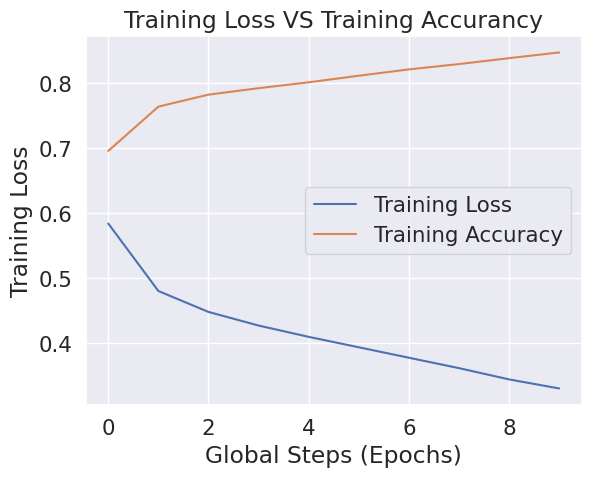

In [ ]:
# Plot a Training Loss 
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss VS Training Accurancy')
plt.xlabel('Global Steps (Epochs)')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

469/469 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     10920
           1       0.65      0.78      0.71      4072

    accuracy                           0.83     14992
   macro avg       0.78      0.81      0.79     14992
weighted avg       0.84      0.83      0.83     14992



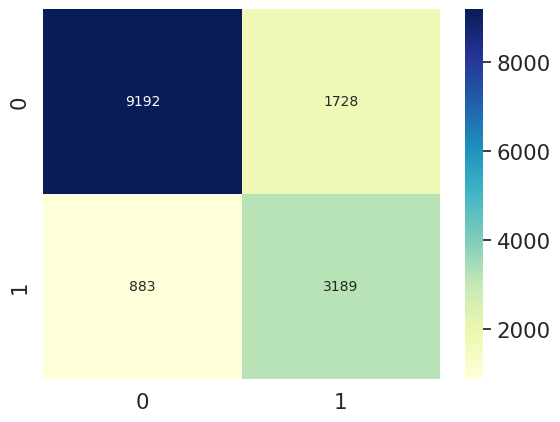

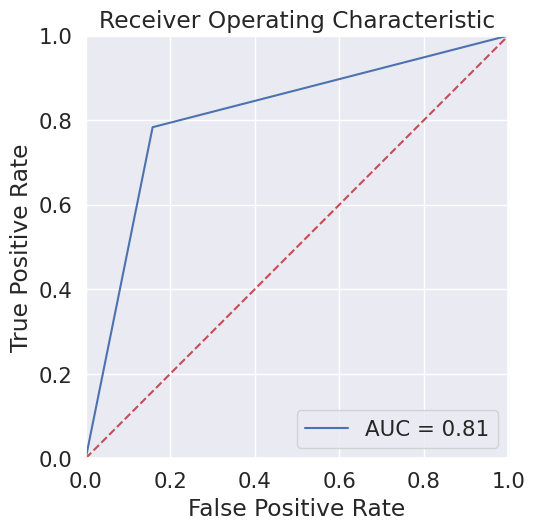

In [ ]:
# Confusion matrix
labels_predict = LSTM_TFIDF_model.predict(data_shuffle_test_3d)
labels_predict = np.where(labels_predict > 0.5, 1, 0)
print(metrics.classification_report(y_val, labels_predict))
plot_confusion_matrix(y_val, labels_predict)
plot_roc_curve(y_val, labels_predict)

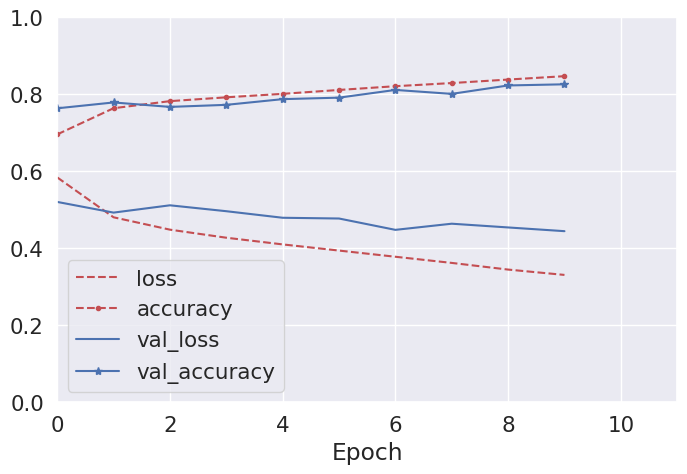

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                2970112   
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,972,737
Trainable params: 2,972,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Draw graph
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 11], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

#Summary
LSTM_TFIDF_model.summary()

### Feature Extraction: BERT

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.7 MB/s eta 0:00:00


In [ ]:
import transformers
import torch

In [ ]:
from transformers import DistilBertModel, DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


In [ ]:
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
data_shuffle_train

headline  \
8229              powerful lego letter parent 1970s real   
5441          shots hear allege brown shoot record audio   
24045   video homeless man good deeds 100 elaborate hoax   
32654         macaulay culkin dead fan freak death rumor   
21626  islamic militants post video claim show behead...   
...                                                  ...   
29805  obama denounce kill journalist jam foley pledg...   
43265  banksy didnt create charlie hebdo tribute cart...   
31856  macaulay culkin dead hoax fake death report sp...   
11766  report islamic state use chlorine gas iraqi force   
23818                 saudi tv blur image michelle obama   

                                                    body  
8229   powerful message lego parent 1974 go viral wee...  
5441   newly release audio allegedly record moment of...  
24045  update dec 31 2014 1130 est video prove person...  
32654  rep duncan hunter rca tell greta van susteren ...  
21626  video allegedly show behead american photojour...  
...                                                  ...  
29805  least 25 suspect boko haram insurgents kill cl...  
43265  eran cicurel editor voice israel quote ypg fig...  
31856  macaulay culkin dead isnt internet would like ...  
11766  mcdonalds burger buy 20 years ago uncanny rese...  
23818  record allegedly make near shoot scene seem in...  

[18710 rows x 2 columns]

In [ ]:
data_combine_shuffle_train = data_shuffle_train['headline'] + ' ' + data_shuffle_train['body']
data_combine_shuffle_train

8229     powerful lego letter parent 1970s real powerfu...
5441     shots hear allege brown shoot record audio new...
24045    video homeless man good deeds 100 elaborate ho...
32654    macaulay culkin dead fan freak death rumor rep...
21626    islamic militants post video claim show behead...
                               ...                        
29805    obama denounce kill journalist jam foley pledg...
43265    banksy didnt create charlie hebdo tribute cart...
31856    macaulay culkin dead hoax fake death report sp...
11766    report islamic state use chlorine gas iraqi fo...
23818    saudi tv blur image michelle obama record alle...
Length: 18710, dtype: object

In [ ]:
# change the data to be list
data_shuffle_train_list = [str(d) for d in data_combine_shuffle_train]
data_shuffle_train_list

['powerful lego letter parent 1970s real powerful message lego parent 1974 go viral weekend company confirm indeed authentic first post reddit user fryd first inform parent “urge create equally strong children boys girls” speak i100couk emma owen lego uk ireland say letter part pamphlet show variety lego doll house products target girls age four 1970s null comment message fryd first say “it seem like we’ve take step backwards” forty years lego disagree text remain relevant day – focus always remain bring creative play experience children world base lego brick lego system – ultimately enable children build create whatever imagine emma owens lego letter 1974 full parent urge create equally strong children boys girls it’s imagination count skill build whatever come head way want bed truck dolls house spaceship lot boys like dolls house they’re human spaceships lot girls prefer spaceships they’re excite dolls house important thing put right material hand let create whatever appeal it’s fir

In [ ]:
# Tokenize and encode the data for train daata
train_encodings = tokenizer(data_shuffle_train_list, max_length=32, truncation=True, padding=True)


In [ ]:
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_mask = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(np.array(labels_shuffle_train))

In [ ]:
data_test_combine = X_val['headline'] + ' ' + X_val['body']
data_test_combine

17851    ‘photo slay leader’ report doctor iraqinewscom...
6400     report radically redesign 12inch macbook air c...
6653     ios 8 bug could delete icloud drive document u...
44559    boko haram could release kidnap girls nigerian...
37749    isis video show execution david cawthorne hain...
                               ...                        
19429    dog go heaven… cat horse pope assure young boy...
31489    banksy arrest giant hoax repeat hoax shoot nat...
2222     time capsule paul revere samuel adams discover...
7940     nigeria claim deal boko haram ceasefire kidnap...
21080    sugarhill gang rapper big bank hank dead 57 us...
Length: 14992, dtype: object

In [ ]:
data_test_list = [str(d) for d in data_test_combine]
data_test_list

['‘photo slay leader’ report doctor iraqinewscom thousands social media users distribute unverified photo claim show body isis leader abu bakr albaghdadi purportedly kill us air strike three senior members isis include aide albaghdadi also kill us air strike death three senior members aide albaghdadi confirm senior iraqi security official interview nbc news thursday strike isis stronghold mosul kill abu hajar alsufi aide abu bakr albaghdadi well explosives operative military leader nearby tal afar source say condition anonymity al arabiya cite iraqi defense ministry say baghdadi’s aide kill pentagon spokesman col steve warren could confirm deaths say isis leaders target add isis leaders embed “inside troop formations likely killed” us carry airstrikes across north iraq brutal terrorists isis gain grind murderous sweep june number news outlets websites publish unverified photo news death albaghdadi us airstrikes iraqinewscom unable verify photo claim albaghdadi kill',
 'report radically

In [ ]:
test_encodings = tokenizer(data_test_list, max_length=32, truncation=True, padding=True)


In [ ]:
# Tokenize and encode the data for train daata
test_input_ids = torch.tensor(test_encodings['input_ids'])
test_attention_mask = torch.tensor(test_encodings['attention_mask'])
test_labels = torch.tensor(np.array(y_val))

In [ ]:
# Embedding the BERT model
with torch.no_grad():
    train_embeddings_3d = bert_model(input_ids=train_input_ids, attention_mask=train_attention_mask)[0]
    test_embeddings_3d = bert_model(input_ids=test_input_ids, attention_mask=test_attention_mask)[0]

In [ ]:
train_embeddings_3d.shape

torch.Size([18710, 32, 768])

In [ ]:
test_embeddings_3d.shape

torch.Size([14992, 32, 768])

In [ ]:
train_labels.shape

torch.Size([18710])

In [ ]:
test_labels.shape

torch.Size([14992])

In [ ]:
#Reshape BERT data from 3 dimension to 2 dimension
train_embeddings_2d = train_embeddings_3d.reshape(train_embeddings_3d.shape[0], -1)
test_embeddings_2d = test_embeddings_3d.reshape(test_embeddings_3d.shape[0], -1)

In [ ]:
print(train_embeddings_2d.shape)
print(test_embeddings_2d.shape)


torch.Size([18710, 24576])
torch.Size([14992, 24576])


### ML: SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear', random_state=0)
svm_model.fit(train_embeddings_2d, train_labels)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm_model.predict(test_embeddings_2d)

In [ ]:
print("Train score:", svm_model.score(train_embeddings_2d, train_labels))
print("Validation score:", svm_model.score(test_embeddings_2d, test_labels))

Train score: 0.6769107429182255
Validation score: 0.5632337246531484


              precision    recall  f1-score   support

           0       0.80      0.54      0.64     10920
           1       0.34      0.64      0.44      4072

    accuracy                           0.56     14992
   macro avg       0.57      0.59      0.54     14992
weighted avg       0.67      0.56      0.59     14992



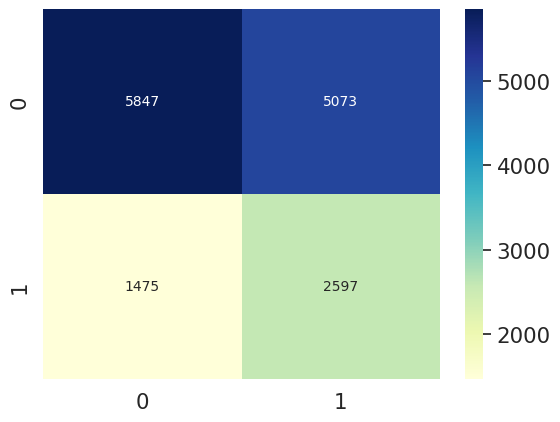

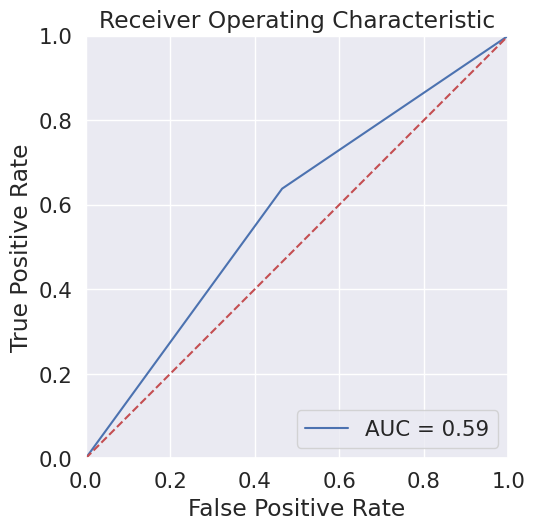

In [ ]:
# Predicting the validation set 

print(metrics.classification_report(test_labels, y_pred))
plot_confusion_matrix(test_labels, y_pred)
plot_roc_curve(test_labels, y_pred)

### DL: LSTM

In [ ]:
print(train_embeddings_3d.shape)
print(test_embeddings_3d.shape)

torch.Size([18710, 32, 768])
torch.Size([14992, 32, 768])


In [ ]:
train_embeddings_3d_numpy = train_embeddings_3d.numpy()
train_labels_numpy = train_labels.numpy()
test_embeddings_3d_numpy = test_embeddings_3d.numpy()
test_labels_numpy = test_labels.numpy()

In [ ]:
from tensorflow.keras.layers import Dropout


In [ ]:
LSTM_BERT_model = Sequential()
LSTM_BERT_model.add(LSTM(units=64, input_shape=(32, 768), return_sequences=True)) #LSTM layer with return_sequences=True
LSTM_BERT_model.add(Dropout(0.2)) #Add a dropout layer for regularization
LSTM_BERT_model.add(LSTM(units=64)) #Add another LSTM layer
LSTM_BERT_model.add(Dense(units=32, activation='relu'))
LSTM_BERT_model.add(Dense(units=16, activation='relu'))
LSTM_BERT_model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
LSTM_BERT_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = LSTM_BERT_model.fit(train_embeddings_3d_numpy, train_labels_numpy, epochs=10, batch_size=64, validation_data=(test_embeddings_3d_numpy, test_labels_numpy))

Epoch 1/10
293/293 [==============================] - 12s 20ms/step - loss: 0.3452 - accuracy: 0.8487 - val_loss: 0.3196 - val_accuracy: 0.8521
Epoch 2/10
293/293 [==============================] - 4s 13ms/step - loss: 0.2009 - accuracy: 0.9229 - val_loss: 0.1899 - val_accuracy: 0.9239
Epoch 3/10
293/293 [==============================] - 4s 12ms/step - loss: 0.1483 - accuracy: 0.9431 - val_loss: 0.1295 - val_accuracy: 0.9505
Epoch 4/10
293/293 [==============================] - 4s 12ms/step - loss: 0.1093 - accuracy: 0.9590 - val_loss: 0.1710 - val_accuracy: 0.9279
Epoch 5/10
293/293 [==============================] - 4s 12ms/step - loss: 0.0968 - accuracy: 0.9636 - val_loss: 0.1235 - val_accuracy: 0.9574
Epoch 6/10
293/293 [==============================] - 4s 12ms/step - loss: 0.0708 - accuracy: 0.9738 - val_loss: 0.1227 - val_accuracy: 0.9576
Epoch 7/10
293/293 [==============================] - 4s 12ms/step - loss: 0.0572 - accuracy: 0.9787 - val_loss: 0.1382 - val_accuracy: 0.955

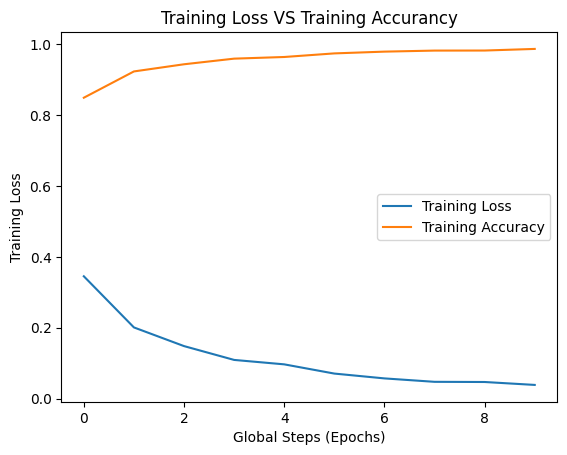

In [ ]:
# Plot a Training Loss 
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss VS Training Accurancy')
plt.xlabel('Global Steps (Epochs)')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

469/469 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     10920
           1       0.92      0.95      0.93      4072

    accuracy                           0.96     14992
   macro avg       0.95      0.96      0.95     14992
weighted avg       0.96      0.96      0.96     14992



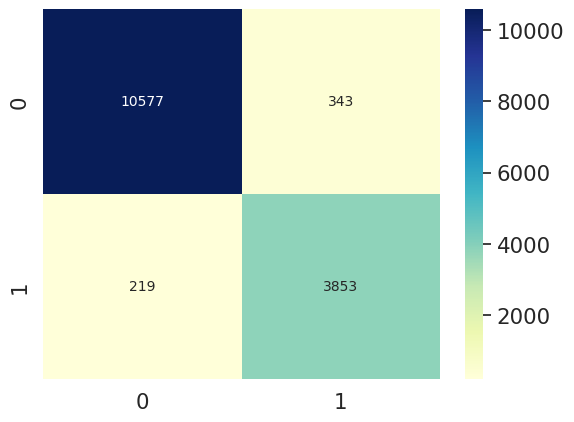

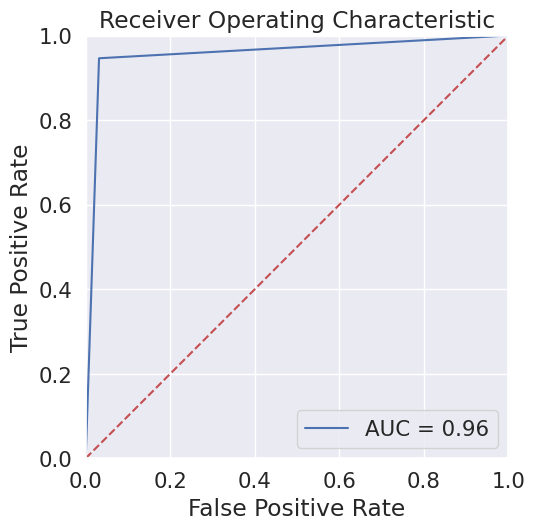

In [ ]:
# Confusion matrix
labels_predict = LSTM_BERT_model.predict(test_embeddings_3d_numpy)
labels_predict = np.where(labels_predict > 0.5, 1, 0)
print(metrics.classification_report(test_labels_numpy, labels_predict))
plot_confusion_matrix(test_labels_numpy, labels_predict)
plot_roc_curve(test_labels_numpy, labels_predict)

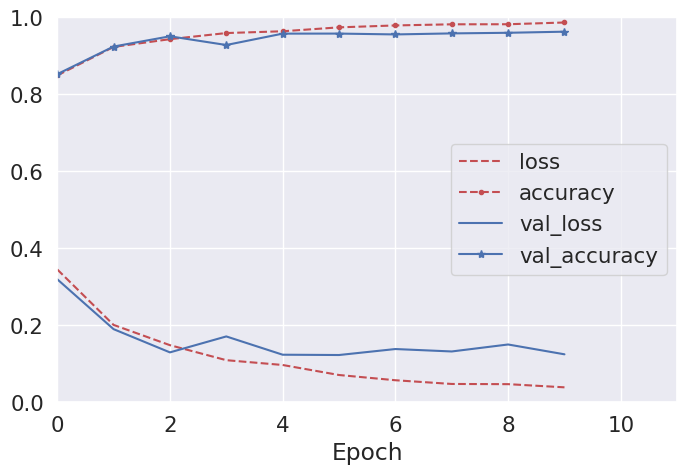

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32, 64)            213248    
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 248,897
Trainable params: 248,897
Non-tr

In [ ]:
#Draw graph
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 11], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

#Summary
LSTM_BERT_model.summary()

# Agree, disagree, discuss classification

## prepare data

In [ ]:
df_re

headline  \
0      police find mass grave least 15 body near mexi...   
1      hundreds palestinians flee flood gaza israel o...   
2      christian bale pass role steve job actor repor...   
3      hbo apple talk 15month apple tv stream service...   
4                   spider burrow tourists stomach chest   
...                                                  ...   
49967  urgent leader isil abu bakr albaghdadi kill photo   
49968  brian williams slam social media speculation w...   
49969     mexico say miss students find first mass grave   
49970  us lawmaker ten isis fighters apprehend come a...   
49971         shots hear allege brown shoot record audio   

                                                    body  target1  target2  
0      danny boyle direct untitled film seth rogen ey...        0        0  
1      hundreds palestinians evacuate home sunday mor...        1        1  
2      30yearold moscow resident hospitalize wound in...        0        0  
3      reuters canadian soldier shoot canadian war me...        0        0  
4      fear arachnophobes story bunburys spiderman mi...        1        3  
...                                                  ...      ...      ...  
49967  cnn boko haram laugh nigerias announcement cea...        0        0  
49968  along unveil apple watch earlier year company ...        0        0  
49969         body find mass grave confirm miss students        1        1  
49970  rep duncan hunter rca tell greta van susteren ...        1        2  
49971  marry tv actor meet young woman kiss sauna wak...        0        0  

[49972 rows x 4 columns]

In [ ]:
df_target2= df_re[df_re['target2'] != 0]
df_target2

headline  \
1      hundreds palestinians flee flood gaza israel o...   
4                   spider burrow tourists stomach chest   
5      nasa confirm earth experience 6 days total dar...   
8      banksy arrest real identity reveal hoax last year   
10                                        gateway pundit   
...                                                  ...   
49946   boko haram deny truce release kidnap schoolgirls   
49949    north korean dictator kim jongun replace sister   
49956  nypd stop arrest lowlevel marijuana charge iss...   
49969     mexico say miss students find first mass grave   
49970  us lawmaker ten isis fighters apprehend come a...   

                                                    body  target1  target2  
1      hundreds palestinians evacuate home sunday mor...        1        1  
4      fear arachnophobes story bunburys spiderman mi...        1        3  
5      thousands people dupe fake news story claim na...        1        1  
8      you’ve see story float around facebook fee ban...        1        1  
10     british rapper whose father await trial manhat...        1        2  
...                                                  ...      ...      ...  
49946  cnn despite government claim ceasefire gunmen ...        1        2  
49949  north korean dictator kim jong un see public m...        1        2  
49956  smalltime drug offenders new york city could s...        1        2  
49969         body find mass grave confirm miss students        1        1  
49970  rep duncan hunter rca tell greta van susteren ...        1        2  

[13427 rows x 4 columns]

In [ ]:
df_target2 = df_target2.drop(["target1"], axis=1)
df_target2

headline  \
1      hundreds palestinians flee flood gaza israel o...   
4                   spider burrow tourists stomach chest   
5      nasa confirm earth experience 6 days total dar...   
8      banksy arrest real identity reveal hoax last year   
10                                        gateway pundit   
...                                                  ...   
49946   boko haram deny truce release kidnap schoolgirls   
49949    north korean dictator kim jongun replace sister   
49956  nypd stop arrest lowlevel marijuana charge iss...   
49969     mexico say miss students find first mass grave   
49970  us lawmaker ten isis fighters apprehend come a...   

                                                    body  target2  
1      hundreds palestinians evacuate home sunday mor...        1  
4      fear arachnophobes story bunburys spiderman mi...        3  
5      thousands people dupe fake news story claim na...        1  
8      you’ve see story float around facebook fee ban...        1  
10     british rapper whose father await trial manhat...        2  
...                                                  ...      ...  
49946  cnn despite government claim ceasefire gunmen ...        2  
49949  north korean dictator kim jong un see public m...        2  
49956  smalltime drug offenders new york city could s...        2  
49969         body find mass grave confirm miss students        1  
49970  rep duncan hunter rca tell greta van susteren ...        2  

[13427 rows x 3 columns]

In [ ]:
labels_target2 = df_target2.drop(["headline","body"], axis=1)
labels_target2

target2
1            1
4            3
5            1
8            1
10           2
...        ...
49946        2
49949        2
49956        2
49969        1
49970        2

[13427 rows x 1 columns]

In [ ]:
datapoints_target2 = df_target2.drop(["target2"], axis=1)
datapoints_target2

headline  \
1      hundreds palestinians flee flood gaza israel o...   
4                   spider burrow tourists stomach chest   
5      nasa confirm earth experience 6 days total dar...   
8      banksy arrest real identity reveal hoax last year   
10                                        gateway pundit   
...                                                  ...   
49946   boko haram deny truce release kidnap schoolgirls   
49949    north korean dictator kim jongun replace sister   
49956  nypd stop arrest lowlevel marijuana charge iss...   
49969     mexico say miss students find first mass grave   
49970  us lawmaker ten isis fighters apprehend come a...   

                                                    body  
1      hundreds palestinians evacuate home sunday mor...  
4      fear arachnophobes story bunburys spiderman mi...  
5      thousands people dupe fake news story claim na...  
8      you’ve see story float around facebook fee ban...  
10     british rapper whose father await trial manhat...  
...                                                  ...  
49946  cnn despite government claim ceasefire gunmen ...  
49949  north korean dictator kim jong un see public m...  
49956  smalltime drug offenders new york city could s...  
49969         body find mass grave confirm miss students  
49970  rep duncan hunter rca tell greta van susteren ...  

[13427 rows x 2 columns]

In [ ]:
# Split the data into training and validation sets 70:20
X_train, X_val, y_train, y_val = train_test_split(datapoints_target2, labels_target2, test_size=0.30, random_state=42)

In [ ]:
print('Size of training set:',X_train.shape)
print('Size of validation set:',X_val.shape)

Size of training set: (9398, 2)
Size of validation set: (4029, 2)


## Resample

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')]

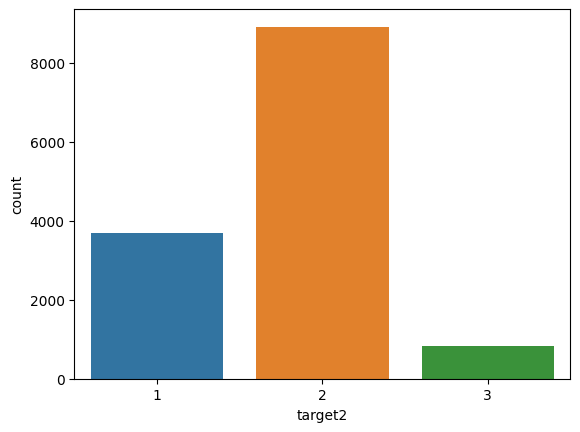

In [ ]:
target2_count=sns.countplot(data=df_target2,x='target2')
target2_count.set_xticklabels(['1','2','3'])

In [ ]:
df_training = pd.DataFrame(datapoints_target2)
df_training["target2"] = y_train
df_agree = df_training[df_training["target2"] == 1]
df_disagree = df_training[df_training["target2"] == 2]
df_discuss = df_training[df_training["target2"] == 3]

df_agree

headline  \
5      nasa confirm earth experience 6 days total dar...   
11        woman detain lebanon albaghdadis wife iraq say   
24     net extra backfromthedead catholic priest clai...   
25     rumor debunk robocopstyle robots patrol micros...   
36     fisherman land 19 stone catfish could biggest ...   
...                                                  ...   
49886     isis fighters seize weapons airdrop mean kurds   
49887   watch us marine save helmet shoot taliban sniper   
49920               tropical spider burrow man skin scar   
49922                         tour agent tiger woods ban   
49925  meteorite leave crater nicaraguan capital managua   

                                                    body  target2  
5      thousands people dupe fake news story claim na...      1.0  
11     iraqi official deny woman detain lebanon wife ...      1.0  
24     71 years old cleric father john micheal o’neal...      1.0  
25     knightscope cofounder stacy stephens say rumor...      1.0  
36     dino ferrari hook whopper wels catfish 267m le...      1.0  
...                                                  ...      ...  
49886  erdogan argue turkish weapons drop harm fight ...      1.0  
49887  importance wear helmet field battle perfectly ...      1.0  
49920  trip bali turn dylan thomas reallife spiderman...      1.0  
49922  palm beach garden fla journeyman professional ...      1.0  
49925  blast near nicaraguan capital city managua sat...      1.0  

[2553 rows x 3 columns]

In [ ]:
df_disagree

headline  \
10                                        gateway pundit   
14        soon marijuana may lead ticket arrest new york   
16               boko haram deny nigeria ceasefire claim   
19             isil behead american photojournalist iraq   
29            report christian bale bail steve job movie   
...                                                  ...   
49944   6 hide mass grave may hold miss mexican students   
49946   boko haram deny truce release kidnap schoolgirls   
49949    north korean dictator kim jongun replace sister   
49956  nypd stop arrest lowlevel marijuana charge iss...   
49970  us lawmaker ten isis fighters apprehend come a...   

                                                    body  target2  
10     british rapper whose father await trial manhat...      2.0  
14     campaign promise reform stopandfrisk mayor bil...      2.0  
16     abuja nigeria — leader nigerias islamist extre...      2.0  
19     jam foley american journalist go miss syria ye...      2.0  
29     christian bale talk play steve job aaron sorki...      2.0  
...                                                  ...      ...  
49944  security force investigate role municipal poli...      2.0  
49946  cnn despite government claim ceasefire gunmen ...      2.0  
49949  north korean dictator kim jong un see public m...      2.0  
49956  smalltime drug offenders new york city could s...      2.0  
49970  rep duncan hunter rca tell greta van susteren ...      2.0  

[6276 rows x 3 columns]

In [ ]:
df_discuss

headline  \
4                   spider burrow tourists stomach chest   
53             pope francis turn make pet heaven comment   
60                  tiger woods sell island lake mälaren   
172    weather reporter catch write name snow ready g...   
278                                    comcast block tor   
...                                                  ...   
49283  bosnia seven underage girls return five day sc...   
49294        nbc weatherman catch urinate woods live air   
49451        jordan king cite clint eastwood revenge vow   
49469  newly discover mass grave link miss mexican st...   
49927  espn save nfls image allmale domestic abuse di...   

                                                    body  target2  
4      fear arachnophobes story bunburys spiderman mi...      3.0  
53     new york — pope francis give hope gays unmarri...      3.0  
60     luxury island previously own tiger woods golfe...      3.0  
172    brian williams take moment monday’s “nbc night...      3.0  
278    report comcast deny internet service users tor...      3.0  
...                                                  ...      ...  
49283  december 17 site call inserbiainfo publish 400...      3.0  
49294  nbc news anchor clear record behalf victimize ...      3.0  
49451  jordan’s king abdullah announce cut short visi...      3.0  
49469  mystery surround disappearance 43 students las...      3.0  
49927  tonight — finally — espn go indepth discussion...      3.0  

[569 rows x 3 columns]

In [ ]:
from sklearn.utils import resample

df_discuss = resample(df_discuss,random_state=42,n_samples=6276)
df_discuss

headline  \
9733           sing polar bear face asbo noise complaint   
36917       robert plant didn’t rip 800 million contract   
23838  see california homeless man use 100 gift give ...   
10243    tropical spider burrow man skin live three days   
6865   oh hey paul rudd one dallas airport homophobe ...   
...                                                  ...   
53             pope francis turn make pet heaven comment   
18438  putin’s motorcade look suspiciously like massive…   
34028  rare meteorite impact cause blast nicaraguas c...   
9733           sing polar bear face asbo noise complaint   
46625  boko haram deny truce say kidnap girls “marrie...   

                                                    body  target2  
9733   central bedfordshire council refute newspaper ...      3.0  
36917  purchase lot things 800 million ten matthew mc...      3.0  
23838  last week heartwarming social experiment video...      3.0  
10243  fear arachnophobes story bunburys spiderman mi...      3.0  
6865   twitter go crazy user claim spot antman star f...      3.0  
...                                                  ...      ...  
53     new york — pope francis give hope gays unmarri...      3.0  
18438  right let’s put one bed quickly vladimir putin...      3.0  
34028  asteroid 60 feet diameter miss hit earth sunda...      3.0  
9733   central bedfordshire council refute newspaper ...      3.0  
46625  nigeria agree truce militant islamist group bo...      3.0  

[6276 rows x 3 columns]

In [ ]:
df_agree = resample(df_agree,random_state=42,n_samples=6276)
df_agree

headline  \
17233  ottawa shoot slay soldier name nathan cirillo ...   
25537                                       kc man ebola   
22502  video marine survive taliban sniper headshot t...   
21871  small red book among find 113yearold boston ti...   
32179     texas plumber ‘no idea’ company truck end isis   
...                                                  ...   
33111          bunch people think banksy get arrest hoax   
21404             italian catch huge wels catfish record   
4908                           dupe macaulay culkin dead   
18375  wife isis leader abu bakr albaghdadi detain le...   
31059   australia 600pound woman give birth 40pound baby   

                                                    body  target2  
17233  young soldier kill terror attack canadian parl...      1.0  
25537  response ebola scare kansas city via kctv 5 pe...      1.0  
22502  video epitome close shave us marine along two ...      1.0  
21871  copper box entomb state capitol 1795 someone c...      1.0  
32179  texas plumber get death threats old truck — st...      1.0  
...                                                  ...      ...  
33111  shock horror here’s vital news report… …which ...      1.0  
21404  fisherman catch giant 8ft 9in long catfish wei...      1.0  
4908   macaulay culkin dead isnt internet would like ...      1.0  
18375  dna test confirm daughter exwife head isis abu...      1.0  
31059  perth 600pound woman give birth 40pound baby p...      1.0  

[6276 rows x 3 columns]

In [ ]:
df_resample = pd.concat([df_agree,df_disagree,df_discuss])
df_resample

headline  \
17233  ottawa shoot slay soldier name nathan cirillo ...   
25537                                       kc man ebola   
22502  video marine survive taliban sniper headshot t...   
21871  small red book among find 113yearold boston ti...   
32179     texas plumber ‘no idea’ company truck end isis   
...                                                  ...   
53             pope francis turn make pet heaven comment   
18438  putin’s motorcade look suspiciously like massive…   
34028  rare meteorite impact cause blast nicaraguas c...   
9733           sing polar bear face asbo noise complaint   
46625  boko haram deny truce say kidnap girls “marrie...   

                                                    body  target2  
17233  young soldier kill terror attack canadian parl...      1.0  
25537  response ebola scare kansas city via kctv 5 pe...      1.0  
22502  video epitome close shave us marine along two ...      1.0  
21871  copper box entomb state capitol 1795 someone c...      1.0  
32179  texas plumber get death threats old truck — st...      1.0  
...                                                  ...      ...  
53     new york — pope francis give hope gays unmarri...      3.0  
18438  right let’s put one bed quickly vladimir putin...      3.0  
34028  asteroid 60 feet diameter miss hit earth sunda...      3.0  
9733   central bedfordshire council refute newspaper ...      3.0  
46625  nigeria agree truce militant islamist group bo...      3.0  

[18828 rows x 3 columns]

In [ ]:
from sklearn.utils import shuffle
df_shuffle_re = shuffle(df_resample)
df_shuffle_re

headline  \
46041           managua explosion meteorite nasa suggest   
5586   michelle obama’s face blur saudi state television   
8220   fake internet week obama’s peace prize pumpkin...   
34558               sex attacker penis cut cleaver india   
24445      despite ebola case kansas city rumor go viral   
...                                                  ...   
31500                    isis unleash scorpion bomb iraq   
31843  incredible video show us marine survive shoot ...   
29            report christian bale bail steve job movie   
37769  michelle obama’s face blur saudi state television   
21134            hostage david haines murder evil pm say   

                                                    body  target2  
46041  managua nicaragua — nicaragua’s government say...      2.0  
5586   barack michelle obama riyadh today meet saudi ...      3.0  
8220   everyone know officially pumpkin spice season ...      1.0  
34558  allege attempt rapist india receive grisly pun...      1.0  
24445  kansas city mo kansas city health officials sa...      1.0  
...                                                  ...      ...  
31500  canisters pack poisonous varieties scorpion bl...      1.0  
31843  dramatic footage afghanistan battlefield show ...      1.0  
29     christian bale talk play steve job aaron sorki...      2.0  
37769  video clip circulate online tuesday purport sh...      3.0  
21134  islamic state release video show behead britis...      1.0  

[18828 rows x 3 columns]

## Feature Extraction: BERT

In [ ]:
labels_shuffle_re =df_shuffle_re.drop(['headline','body'], axis = 1)
labels_shuffle_re

target2
46041      2.0
5586       3.0
8220       1.0
34558      1.0
24445      1.0
...        ...
31500      1.0
31843      1.0
29         2.0
37769      3.0
21134      1.0

[18828 rows x 1 columns]

In [ ]:
datapoints_shuffle_re = df_shuffle_re.drop(["target2"], axis=1)
datapoints_shuffle_re

headline  \
46041           managua explosion meteorite nasa suggest   
5586   michelle obama’s face blur saudi state television   
8220   fake internet week obama’s peace prize pumpkin...   
34558               sex attacker penis cut cleaver india   
24445      despite ebola case kansas city rumor go viral   
...                                                  ...   
31500                    isis unleash scorpion bomb iraq   
31843  incredible video show us marine survive shoot ...   
29            report christian bale bail steve job movie   
37769  michelle obama’s face blur saudi state television   
21134            hostage david haines murder evil pm say   

                                                    body  
46041  managua nicaragua — nicaragua’s government say...  
5586   barack michelle obama riyadh today meet saudi ...  
8220   everyone know officially pumpkin spice season ...  
34558  allege attempt rapist india receive grisly pun...  
24445  kansas city mo kansas city health officials sa...  
...                                                  ...  
31500  canisters pack poisonous varieties scorpion bl...  
31843  dramatic footage afghanistan battlefield show ...  
29     christian bale talk play steve job aaron sorki...  
37769  video clip circulate online tuesday purport sh...  
21134  islamic state release video show behead britis...  

[18828 rows x 2 columns]

In [ ]:
datapoints_shuffle_re_combine = datapoints_shuffle_re['headline'] + ' ' + datapoints_shuffle_re['body']
datapoints_shuffle_re_combine

46041    managua explosion meteorite nasa suggest manag...
5586     michelle obama’s face blur saudi state televis...
8220     fake internet week obama’s peace prize pumpkin...
34558    sex attacker penis cut cleaver india allege at...
24445    despite ebola case kansas city rumor go viral ...
                               ...                        
31500    isis unleash scorpion bomb iraq canisters pack...
31843    incredible video show us marine survive shoot ...
29       report christian bale bail steve job movie chr...
37769    michelle obama’s face blur saudi state televis...
21134    hostage david haines murder evil pm say islami...
Length: 18828, dtype: object

In [ ]:
# chang it to list to be run in BERT
data_shuffle_train_list = [str(d) for d in datapoints_shuffle_re_combine]
data_shuffle_train_list

['managua explosion meteorite nasa suggest managua nicaragua — nicaragua’s government say sunday mysterious boom hear overnight capital make small meteorite leave crater wooded area near managua’s airport government spokeswoman rosario murillo say committee study meteorite find “appears come asteroid pass close earth” result crater radius 39 feet 16 feet deep say humberto saballos volcanologist nicaraguan institute territorial study committee say clear meteorite disintegrate bury residents report hear loud boom saturday night say see anything strange “i sit porch saw nothing sudden hear large blast” jorge santamaria say “we think bomb felt expansive wave” humberto garcia astronomy center national autonomous university nicaragua say asteroid forecast pass saturday meteorite say “we study could ice rock”',
 'michelle obama’s face blur saudi state television barack michelle obama riyadh today meet saudi arabias new ruler king salman bin abdulaziz al saud footage king receive us delegation

In [ ]:
X_val_re = X_val['headline'] + ' ' + X_val['body']
X_val_re

7702     bostoncom retract claim racist email professor...
35286    canadianisraeli woman may capture syria report...
23658    man break tear lose record decease wife resurf...
4044     boko haram deny ceasefire leader say marry kid...
44698    report radically redesign 12inch macbook air c...
                               ...                        
39680    isis reportedly behead american photojournalis...
49626    mexico say students among dead mass grave none...
9390     macaulay culkin dead hoax go viral claim actor...
44223    rumor isis leaders death debunk islamic state ...
25780    lowlevel marijuana possession could soon land ...
Length: 4029, dtype: object

In [ ]:
# chang it to list to be run in BERT
X_val_list = [str(d) for d in X_val_re]
X_val_list

['bostoncom retract claim racist email professor today websherfif retraction bostoncom earlier tonight bostoncom publish piece suggest harvard business school professor ben edelman send email racist overtones sichuan garden cannot verify edelman fact send email take story web sheriff hot right web sheriff don’t even know what’s true anymore send racist email bostoncom make stuff hope it’s real quote kevin malone need believe something',
 'canadianisraeli woman may capture syria report canadianisraeli woman join rank kurdish militias fight islamic state northern syria take captive isis fighters blog islamist websites think close militant group report blog consider one islamic state media arm report several female fighters fight alongside kurds capture among gill rosenberg accord report prior capture islamic state fighters make three suicide bomb attack kurdish outposts kill capture many others accord israel radio kurdish source deny report say rosenberg wasnt area attack gill rosenberg 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.2 MB/s eta 0:00:00


In [ ]:
import transformers
import torch

In [ ]:
from transformers import DistilBertModel, DistilBertTokenizer

# Load the pre-trained tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_length = 0
for datapoint in datapoints_shuffle_re_combine:
    length = len(datapoint)
    if length > max_length:
        max_length = length
print(max_length)

18786


In [ ]:
train_encodings = tokenizer(data_shuffle_train_list, max_length=32, truncation=True, padding=True)
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_mask = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(np.array(labels_shuffle_re))

In [ ]:
test_encodings = tokenizer(X_val_list, max_length=32, truncation=True, padding=True)
# change data type to tensor form to be ready for running the BERT model
test_input_ids = torch.tensor(test_encodings['input_ids'])
test_attention_mask = torch.tensor(test_encodings['attention_mask'])
test_labels = torch.tensor(np.array(y_val))

In [ ]:
# get the BERT embeddings of the text data
with torch.no_grad():
    train_embeddings_3d = bert_model(input_ids=train_input_ids, attention_mask=train_attention_mask)[0]
    test_embeddings_3d = bert_model(input_ids=test_input_ids, attention_mask=test_attention_mask)[0]

In [ ]:
print(train_embeddings_3d.shape)
print(test_embeddings_3d.shape)
print(train_labels.shape)
print(test_labels.shape)

torch.Size([18828, 32, 768])
torch.Size([4029, 32, 768])
torch.Size([18828, 1])
torch.Size([4029, 1])


In [ ]:
test_labels

tensor([[2],
        [2],
        [1],
        ...,
        [1],
        [2],
        [2]])

## Feature Extraction: TFIDF

In [ ]:
def tokenizing(text):
    numbers = re.compile(r'\d+')
    text = numbers.sub('', text)
    words = word_tokenize(text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
datapoints_shuffle_re_train_LSTM = datapoints_shuffle_re[['headline', 'body']]
datapoints_shuffle_re_train_LSTM = datapoints_shuffle_re_train_LSTM[['headline', 'body']].apply(lambda x: x.apply(tokenizing))
X_val_LSTM = X_val[['headline', 'body']] #still keep the original X_val so build new dataframe to calculate in data_shuffle_test
X_val_LSTM[['headline', 'body']] = X_val_LSTM[['headline', 'body']].apply(lambda x: x.apply(tokenizing))

In [ ]:
#Vectorize training and testing dataset
tfidf = TfidfVectorizer(decode_error='ignore', lowercase= False, min_df=0.001) 
datapoints_shuffle_re_train_LSTM = tfidf.fit_transform(datapoints_shuffle_re_train_LSTM['headline'].astype('U') + ' ' + datapoints_shuffle_re_train_LSTM['body'].astype('U'))
X_val_LSTM = tfidf.transform(X_val_LSTM['headline'].astype('U') + ' ' + X_val_LSTM['body'].astype('U'))

In [ ]:
X_val_LSTM.shape

(4029, 10766)

In [ ]:
#Change data into 3 dimensional to be ready for deep learning machine
datapoints_shuffle_re_train_LSTM_3d = np.reshape(datapoints_shuffle_re_train_LSTM.toarray(), (datapoints_shuffle_re_train_LSTM.shape[0], 1, 10766))
X_val_LSTM_3d = np.reshape(X_val_LSTM.toarray(), (X_val_LSTM.shape[0], 1, 10766))

### DL: LSTM

BERT feature extraction

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
train_embeddings_3d_numpy = train_embeddings_3d.numpy()
train_labels_numpy = train_labels.numpy()
test_embeddings_3d_numpy = test_embeddings_3d.numpy()
test_labels_numpy = test_labels.numpy()

In [ ]:
test_embeddings_3d_numpy

array([[[-1.80321634e-02, -1.36115313e-01, -1.74967170e-01, ...,
         -1.16769165e-01,  4.88918811e-01,  2.25031331e-01],
        [ 1.67527080e-01, -3.85851599e-02,  1.92518637e-01, ...,
         -1.56162502e-02,  1.74178630e-01,  2.80487597e-01],
        [ 3.90790820e-01, -2.81031579e-01,  4.85536046e-02, ...,
          1.29855722e-01,  2.73831487e-01, -1.14500761e-01],
        ...,
        [-2.52567381e-01,  1.01320297e-02,  6.58556968e-02, ...,
          7.02408254e-02,  1.86783671e-01, -1.98846564e-01],
        [-3.55396330e-01, -4.00523365e-01,  1.58226311e-01, ...,
         -1.24260768e-01,  5.76196015e-02, -2.32245550e-01],
        [ 7.97454178e-01,  2.02969551e-01, -4.14298147e-01, ...,
         -6.97843656e-02, -4.46693480e-01, -2.12616295e-01]],

       [[-1.79613262e-01, -1.83668971e-01, -3.77489835e-01, ...,
         -3.99507582e-01,  4.06319350e-01,  1.31005093e-01],
        [ 4.83344272e-02,  4.54600066e-01, -5.04258692e-01, ...,
         -9.25284103e-02,  2.75254816e

In [ ]:
LSTM_BERT_model = Sequential()
LSTM_BERT_model.add(LSTM(units=128, input_shape=(32, 768), return_sequences=True)) #LSTM layer with return_sequences=True
LSTM_BERT_model.add(Dropout(0.2)) #Add a dropout layer for regularization
LSTM_BERT_model.add(LSTM(units=64)) #Add another LSTM layer
LSTM_BERT_model.add(Dense(units=32, activation='relu'))
LSTM_BERT_model.add(Dense(units=16, activation='relu'))
LSTM_BERT_model.add(Dense(units=3, activation='softmax')) #Change the output layer to have 3 units and softmax activation

In [ ]:
LSTM_BERT_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = LSTM_BERT_model.fit(train_embeddings_3d_numpy, train_labels_numpy,
                              epochs=10, batch_size=64,
                              validation_data=(test_embeddings_3d_numpy, test_labels_numpy))

Epoch 1/10
295/295 [==============================] - 7s 13ms/step - loss: nan - accuracy: 0.0011 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
295/295 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
295/295 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000

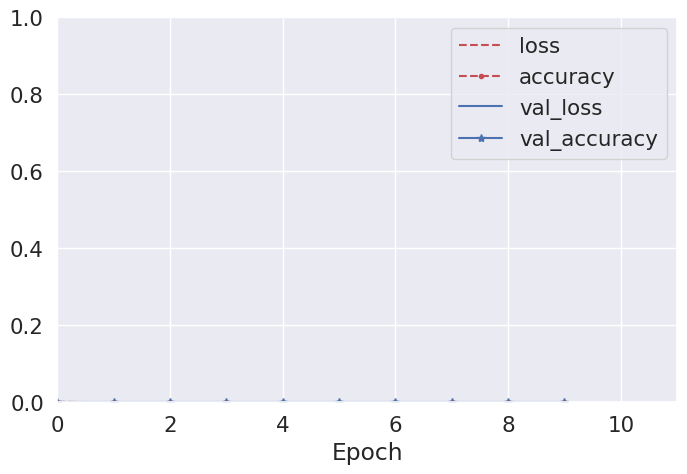

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32, 128)           459264    
                                                                 
 dropout_1 (Dropout)         (None, 32, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 511,331
Trainable params: 511,331
Non-tr

In [ ]:
#Draw graph
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 11], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

#Summary
LSTM_BERT_model.summary()

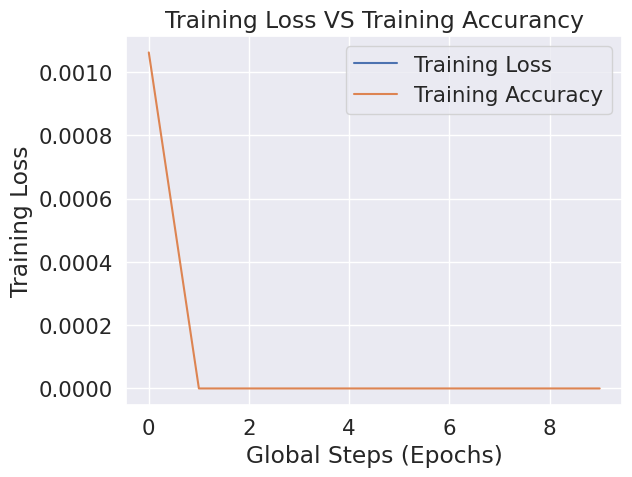

In [ ]:
# Plot a Training Loss 
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss VS Training Accurancy')
plt.xlabel('Global Steps (Epochs)')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

126/126 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           1       0.28      1.00      0.44      1125
           2       0.00      0.00      0.00      2633
           3       0.00      0.00      0.00       271

    accuracy                           0.28      4029
   macro avg       0.09      0.33      0.15      4029
weighted avg       0.08      0.28      0.12      4029



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


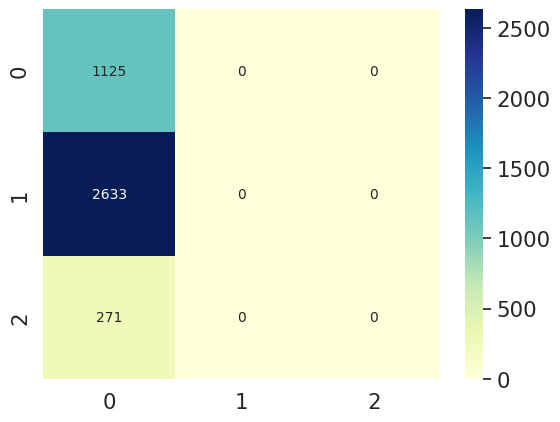

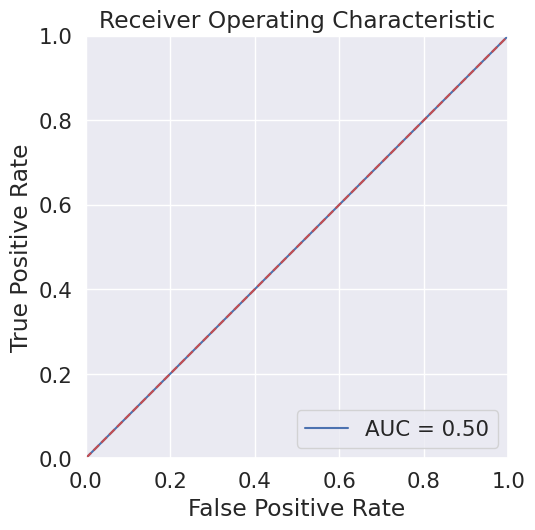

In [ ]:
# Confusion matrix
labels_predict = LSTM_BERT_model.predict(test_embeddings_3d_numpy)
labels_predict = np.argmax(labels_predict, axis=1) + 1 # add 1 to shift from 0-indexed to 1-indexed labels
print(metrics.classification_report(test_labels_numpy, labels_predict))
plot_confusion_matrix(test_labels_numpy, labels_predict)
plot_roc_curve(test_labels_numpy, labels_predict)

In [ ]:
labels_predict

array([1, 1, 1, ..., 1, 1, 1])

TFIDF feature extraction

In [ ]:
history = LSTM_BERT_model.fit(datapoints_shuffle_re_train_LSTM_3d, train_labels_numpy,
                              epochs=10, batch_size=64,
                              validation_data=(X_val_LSTM_3d, test_labels_numpy))

Epoch 1/10
295/295 [==============================] - 4s 10ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
295/295 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
295/295 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
295/295 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
295/295 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
295/295 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.

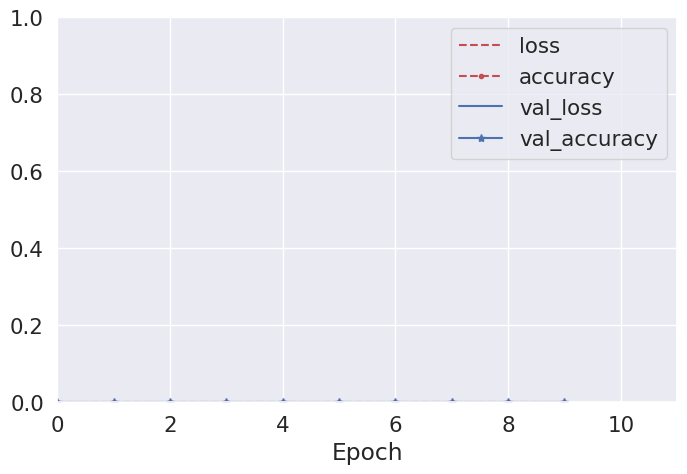

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32, 128)           459264    
                                                                 
 dropout_1 (Dropout)         (None, 32, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 511,331
Trainable params: 511,331
Non-tr

In [ ]:
#Draw graph
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 11], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

#Summary
LSTM_BERT_model.summary()

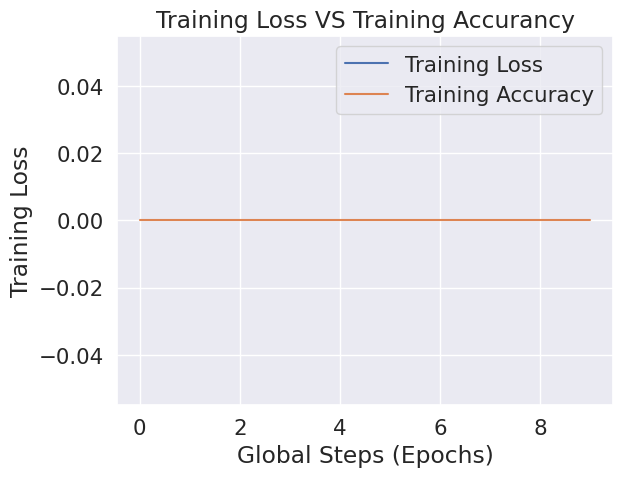

In [ ]:
# Plot a Training Loss 
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss VS Training Accurancy')
plt.xlabel('Global Steps (Epochs)')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

126/126 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           1       0.28      1.00      0.44      1125
           2       0.00      0.00      0.00      2633
           3       0.00      0.00      0.00       271

    accuracy                           0.28      4029
   macro avg       0.09      0.33      0.15      4029
weighted avg       0.08      0.28      0.12      4029



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


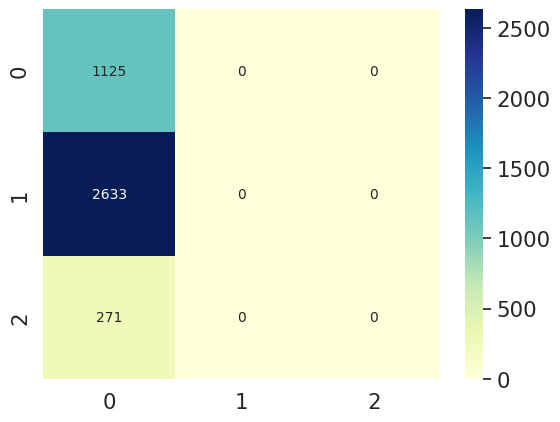

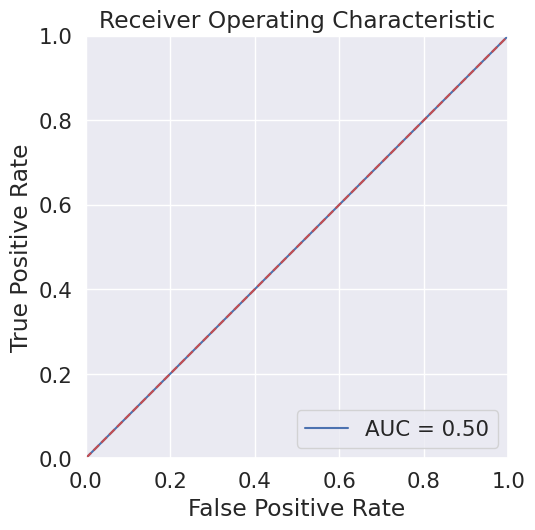

In [ ]:
# Confusion matrix
labels_predict = LSTM_BERT_model.predict(X_val_LSTM_3d)
labels_predict = np.argmax(labels_predict, axis=1) + 1 # add 1 to shift from 0-indexed to 1-indexed labels
print(metrics.classification_report(test_labels_numpy, labels_predict))
plot_confusion_matrix(test_labels_numpy, labels_predict)
plot_roc_curve(test_labels_numpy, labels_predict)

# Checking model with unseen data

## Merge Test data

In [ ]:
Test_bodies = pd.read_csv("competition_test_bodies.csv")
Test_bodies

Body ID                                        articleBody
0          1  Al-Sisi has denied Israeli reports stating tha...
1          2  A bereaved Afghan mother took revenge on the T...
2          3  CNBC is reporting Tesla has chosen Nevada as t...
3         12  A 4-inch version of the iPhone 6 is said to be...
4         19  GR editor’s Note\n\nThere are no reports in th...
..       ...                                                ...
899     2582  Congressional Republicans, evidently hoping th...
900     2583  Did Obamacare work?\n\nIt’s worth reflecting u...
901     2584  Millions may lose coverage next year if Congre...
902     2585  Come November, the grim trudge across the incr...
903     2586  Remember how much Republicans wanted to repeal...

[904 rows x 2 columns]

In [ ]:
Test_stance = pd.read_csv("competition_test_stances.csv")
Test_stance

Headline  Body ID     Stance
0      Ferguson riots: Pregnant woman loses eye after...     2008  unrelated
1      Crazy Conservatives Are Sure a Gitmo Detainee ...     1550  unrelated
2      A Russian Guy Says His Justin Bieber Ringtone ...        2  unrelated
3      Zombie Cat: Buried Kitty Believed Dead, Meows ...     1793  unrelated
4      Argentina's President Adopts Boy to End Werewo...       37  unrelated
...                                                  ...      ...        ...
25408  The success of the Affordable Care Act is a hu...     2582      agree
25409  The success of the Affordable Care Act is a hu...     2583    discuss
25410  The success of the Affordable Care Act is a hu...     2584   disagree
25411  The success of the Affordable Care Act is a hu...     2585   disagree
25412  The success of the Affordable Care Act is a hu...     2586      agree

[25413 rows x 3 columns]

In [ ]:
df_test = pd.merge(Test_stance, Test_bodies, on="Body ID", how="left")
df_test

Headline  Body ID     Stance  \
0      Ferguson riots: Pregnant woman loses eye after...     2008  unrelated   
1      Crazy Conservatives Are Sure a Gitmo Detainee ...     1550  unrelated   
2      A Russian Guy Says His Justin Bieber Ringtone ...        2  unrelated   
3      Zombie Cat: Buried Kitty Believed Dead, Meows ...     1793  unrelated   
4      Argentina's President Adopts Boy to End Werewo...       37  unrelated   
...                                                  ...      ...        ...   
25408  The success of the Affordable Care Act is a hu...     2582      agree   
25409  The success of the Affordable Care Act is a hu...     2583    discuss   
25410  The success of the Affordable Care Act is a hu...     2584   disagree   
25411  The success of the Affordable Care Act is a hu...     2585   disagree   
25412  The success of the Affordable Care Act is a hu...     2586      agree   

                                             articleBody  
0      A RESPECTED senior French police officer inves...  
1      Dave Morin's social networking company Path is...  
2      A bereaved Afghan mother took revenge on the T...  
3      Hewlett-Packard is officially splitting in two...  
4      An airline passenger headed to Dallas was remo...  
...                                                  ...  
25408  Congressional Republicans, evidently hoping th...  
25409  Did Obamacare work?\n\nIt’s worth reflecting u...  
25410  Millions may lose coverage next year if Congre...  
25411  Come November, the grim trudge across the incr...  
25412  Remember how much Republicans wanted to repeal...  

[25413 rows x 4 columns]

In [ ]:
stances1_map = {'unrelated':0 , 'agree':1, 'discuss':1,'disagree':1}
df_test['stances1'] = df_test['Stance'].map(stances1_map)
df_test

Headline  Body ID     Stance  \
0      Ferguson riots: Pregnant woman loses eye after...     2008  unrelated   
1      Crazy Conservatives Are Sure a Gitmo Detainee ...     1550  unrelated   
2      A Russian Guy Says His Justin Bieber Ringtone ...        2  unrelated   
3      Zombie Cat: Buried Kitty Believed Dead, Meows ...     1793  unrelated   
4      Argentina's President Adopts Boy to End Werewo...       37  unrelated   
...                                                  ...      ...        ...   
25408  The success of the Affordable Care Act is a hu...     2582      agree   
25409  The success of the Affordable Care Act is a hu...     2583    discuss   
25410  The success of the Affordable Care Act is a hu...     2584   disagree   
25411  The success of the Affordable Care Act is a hu...     2585   disagree   
25412  The success of the Affordable Care Act is a hu...     2586      agree   

                                             articleBody  stances1  
0      A RESPECTED senior French police officer inves...         0  
1      Dave Morin's social networking company Path is...         0  
2      A bereaved Afghan mother took revenge on the T...         0  
3      Hewlett-Packard is officially splitting in two...         0  
4      An airline passenger headed to Dallas was remo...         0  
...                                                  ...       ...  
25408  Congressional Republicans, evidently hoping th...         1  
25409  Did Obamacare work?\n\nIt’s worth reflecting u...         1  
25410  Millions may lose coverage next year if Congre...         1  
25411  Come November, the grim trudge across the incr...         1  
25412  Remember how much Republicans wanted to repeal...         1  

[25413 rows x 5 columns]

In [ ]:
stances2_map = {'unrelated':0 , 'agree':1, 'discuss':2,'disagree':3}
df_test['stances2'] = df_test['Stance'].map(stances2_map)
df_test

Headline  Body ID     Stance  \
0      Ferguson riots: Pregnant woman loses eye after...     2008  unrelated   
1      Crazy Conservatives Are Sure a Gitmo Detainee ...     1550  unrelated   
2      A Russian Guy Says His Justin Bieber Ringtone ...        2  unrelated   
3      Zombie Cat: Buried Kitty Believed Dead, Meows ...     1793  unrelated   
4      Argentina's President Adopts Boy to End Werewo...       37  unrelated   
...                                                  ...      ...        ...   
25408  The success of the Affordable Care Act is a hu...     2582      agree   
25409  The success of the Affordable Care Act is a hu...     2583    discuss   
25410  The success of the Affordable Care Act is a hu...     2584   disagree   
25411  The success of the Affordable Care Act is a hu...     2585   disagree   
25412  The success of the Affordable Care Act is a hu...     2586      agree   

                                             articleBody  stances1  stances2  
0      A RESPECTED senior French police officer inves...         0         0  
1      Dave Morin's social networking company Path is...         0         0  
2      A bereaved Afghan mother took revenge on the T...         0         0  
3      Hewlett-Packard is officially splitting in two...         0         0  
4      An airline passenger headed to Dallas was remo...         0         0  
...                                                  ...       ...       ...  
25408  Congressional Republicans, evidently hoping th...         1         1  
25409  Did Obamacare work?\n\nIt’s worth reflecting u...         1         2  
25410  Millions may lose coverage next year if Congre...         1         3  
25411  Come November, the grim trudge across the incr...         1         3  
25412  Remember how much Republicans wanted to repeal...         1         1  

[25413 rows x 6 columns]

In [ ]:
headline_COLUMN  = 'Headline'
body_COLUMN = 'articleBody'
stances1_COLUMN = 'stances1'
stances2_COLUMN = 'stances2'

In [ ]:
df_test_re = df_test[[headline_COLUMN, body_COLUMN, stances1_COLUMN, stances2_COLUMN]]
df_test_re

Headline  \
0      Ferguson riots: Pregnant woman loses eye after...   
1      Crazy Conservatives Are Sure a Gitmo Detainee ...   
2      A Russian Guy Says His Justin Bieber Ringtone ...   
3      Zombie Cat: Buried Kitty Believed Dead, Meows ...   
4      Argentina's President Adopts Boy to End Werewo...   
...                                                  ...   
25408  The success of the Affordable Care Act is a hu...   
25409  The success of the Affordable Care Act is a hu...   
25410  The success of the Affordable Care Act is a hu...   
25411  The success of the Affordable Care Act is a hu...   
25412  The success of the Affordable Care Act is a hu...   

                                             articleBody  stances1  stances2  
0      A RESPECTED senior French police officer inves...         0         0  
1      Dave Morin's social networking company Path is...         0         0  
2      A bereaved Afghan mother took revenge on the T...         0         0  
3      Hewlett-Packard is officially splitting in two...         0         0  
4      An airline passenger headed to Dallas was remo...         0         0  
...                                                  ...       ...       ...  
25408  Congressional Republicans, evidently hoping th...         1         1  
25409  Did Obamacare work?\n\nIt’s worth reflecting u...         1         2  
25410  Millions may lose coverage next year if Congre...         1         3  
25411  Come November, the grim trudge across the incr...         1         3  
25412  Remember how much Republicans wanted to repeal...         1         1  

[25413 rows x 4 columns]

In [ ]:
df_test_re = shuffle(df_test_re)
df_test_re

Headline  \
18656  Man saved from bear attack - thanks to his Jus...   
2760                                       Stolen Member   
7626   Phone 6s Will Sport Dual-lens Camera, Healthki...   
4186                               President Sisi's Gift   
14102  Joan Rivers' Personal Doctor Allegedly Took A ...   
...                                                  ...   
3275   Missing Afghan soldiers taken into custody at ...   
14111  Joan Rivers' Doctor Took a Selfie While She Wa...   
9633   Argentina’s president adopts Jewish boy to sav...   
17883  There's A Weird Story Going Around About How A...   
16037  Scorpion stings flier on Alaska Airlines fligh...   

                                             articleBody  stances1  stances2  
18656  A Russian fisherman says the only thing that p...         1         2  
2760   The hackers behind a devastating cyberattack a...         0         0  
7626   We all had our suspicions about the three-boob...         0         0  
4186   White House Chief of Staff Denis McDonough is ...         0         0  
14102  Raven Symone didn’t file any “molestation char...         0         0  
...                                                  ...       ...       ...  
3275   Spokesman for Palestinian President Abbas,Taye...         0         0  
14111  Notorious murderer Charles Manson, 80, is prob...         0         0  
9633   Argentina’s president adopted a Jewish godson ...         1         1  
17883  Apple has multiple versions of its upcoming sm...         0         0  
16037  Analysis based on claims reported on Israel Ar...         0         0  

[25413 rows x 4 columns]

## Clean data

Lowercase

In [ ]:
df_test_re= df_test_re.applymap(lambda s:s.lower() if type(s) == str else s)
df_test_re

Headline  \
18656  man saved from bear attack - thanks to his jus...   
2760                                       stolen member   
7626   phone 6s will sport dual-lens camera, healthki...   
4186                               president sisi's gift   
14102  joan rivers' personal doctor allegedly took a ...   
...                                                  ...   
3275   missing afghan soldiers taken into custody at ...   
14111  joan rivers' doctor took a selfie while she wa...   
9633   argentina’s president adopts jewish boy to sav...   
17883  there's a weird story going around about how a...   
16037  scorpion stings flier on alaska airlines fligh...   

                                             articleBody  stances1  stances2  
18656  a russian fisherman says the only thing that p...         1         2  
2760   the hackers behind a devastating cyberattack a...         0         0  
7626   we all had our suspicions about the three-boob...         0         0  
4186   white house chief of staff denis mcdonough is ...         0         0  
14102  raven symone didn’t file any “molestation char...         0         0  
...                                                  ...       ...       ...  
3275   spokesman for palestinian president abbas,taye...         0         0  
14111  notorious murderer charles manson, 80, is prob...         0         0  
9633   argentina’s president adopted a jewish godson ...         1         1  
17883  apple has multiple versions of its upcoming sm...         0         0  
16037  analysis based on claims reported on israel ar...         0         0  

[25413 rows x 4 columns]

Remove punctuation

In [ ]:
df_test_re['articleBody'] = df_test_re['articleBody'].apply(lambda x: remove_punct(x))
df_test_re

Headline  \
18656  man saved from bear attack - thanks to his jus...   
2760                                       stolen member   
7626   phone 6s will sport dual-lens camera, healthki...   
4186                               president sisi's gift   
14102  joan rivers' personal doctor allegedly took a ...   
...                                                  ...   
3275   missing afghan soldiers taken into custody at ...   
14111  joan rivers' doctor took a selfie while she wa...   
9633   argentina’s president adopts jewish boy to sav...   
17883  there's a weird story going around about how a...   
16037  scorpion stings flier on alaska airlines fligh...   

                                             articleBody  stances1  stances2  
18656  a russian fisherman says the only thing that p...         1         2  
2760   the hackers behind a devastating cyberattack a...         0         0  
7626   we all had our suspicions about the threeboob ...         0         0  
4186   white house chief of staff denis mcdonough is ...         0         0  
14102  raven symone didn’t file any “molestation char...         0         0  
...                                                  ...       ...       ...  
3275   spokesman for palestinian president abbastayeb...         0         0  
14111  notorious murderer charles manson 80 is probab...         0         0  
9633   argentina’s president adopted a jewish godson ...         1         1  
17883  apple has multiple versions of its upcoming sm...         0         0  
16037  analysis based on claims reported on israel ar...         0         0  

[25413 rows x 4 columns]

In [ ]:
df_test_re['Headline'] = df_test_re['Headline'].apply(lambda x: remove_punct(x))
df_test_re

Headline  \
18656  man saved from bear attack  thanks to his just...   
2760                                       stolen member   
7626   phone 6s will sport duallens camera healthkit ...   
4186                                president sisis gift   
14102  joan rivers personal doctor allegedly took a s...   
...                                                  ...   
3275   missing afghan soldiers taken into custody at ...   
14111  joan rivers doctor took a selfie while she was...   
9633   argentina’s president adopts jewish boy to sav...   
17883  theres a weird story going around about how ar...   
16037  scorpion stings flier on alaska airlines fligh...   

                                             articleBody  stances1  stances2  
18656  a russian fisherman says the only thing that p...         1         2  
2760   the hackers behind a devastating cyberattack a...         0         0  
7626   we all had our suspicions about the threeboob ...         0         0  
4186   white house chief of staff denis mcdonough is ...         0         0  
14102  raven symone didn’t file any “molestation char...         0         0  
...                                                  ...       ...       ...  
3275   spokesman for palestinian president abbastayeb...         0         0  
14111  notorious murderer charles manson 80 is probab...         0         0  
9633   argentina’s president adopted a jewish godson ...         1         1  
17883  apple has multiple versions of its upcoming sm...         0         0  
16037  analysis based on claims reported on israel ar...         0         0  

[25413 rows x 4 columns]

Remove stiop words

In [ ]:
df_test_re['articleBody'] = df_test_re['articleBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test_re['Headline'] = df_test_re['Headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test_re

Headline  \
18656  man saved bear attack thanks justin bieber rin...   
2760                                       stolen member   
7626   phone 6s sport duallens camera healthkit senso...   
4186                                president sisis gift   
14102  joan rivers personal doctor allegedly took sel...   
...                                                  ...   
3275   missing afghan soldiers taken custody canadian...   
14111   joan rivers doctor took selfie anesthesia report   
9633   argentina’s president adopts jewish boy save l...   
17883  theres weird story going around argentinas pre...   
16037    scorpion stings flier alaska airlines flight la   

                                             articleBody  stances1  stances2  
18656  russian fisherman says thing prevented brown b...         1         2  
2760   hackers behind devastating cyberattack sony pi...         0         0  
7626   suspicions threeboob ladys third boob appears ...         0         0  
4186   white house chief staff denis mcdonough denyin...         0         0  
14102  raven symone didn’t file “molestation charges”...         0         0  
...                                                  ...       ...       ...  
3275   spokesman palestinian president abbastayeb abd...         0         0  
14111  notorious murderer charles manson 80 probably ...         0         0  
9633   argentina’s president adopted jewish godson la...         1         1  
17883  apple multiple versions upcoming smartwatch al...         0         0  
16037  analysis based claims reported israel army rad...         0         0  

[25413 rows x 4 columns]

Lemmatization

In [ ]:
text = df_test_re.articleBody.unique()[1:]
text = list(map(lambda x: x.replace('%20', ' '), text))

df_test_re['articleBody'] = df_test_re['articleBody'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
text = df_test_re.Headline.unique()[1:]
text = list(map(lambda x: x.replace('%20', ' '), text))

df_test_re['Headline'] = df_test_re['Headline'].apply(lambda x: lemmatize_sentence(x))

Check most word

In [ ]:
word_count = Counter(" ".join(df_test_re['articleBody']).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

     Word  Frequency
0     say      66037
1  report      32634
2      us      23707
3   apple      22224
4    tell      22103
5   would      21764
6    take      21028
7    also      19570
8   state      19151
9      go      18568


In [ ]:
word_count = Counter(" ".join(df_test_re['Headline']).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

     Word  Frequency
0  report       2828
1    isis       2605
2   woman       2455
3    joan       2118
4  selfie       2105
5   apple       2058
6      us       2035
7  behead       1906
8  doctor       1883
9  breast       1759


Split datapopints & labels

In [ ]:
df_test_drop = df_test_re.sample(frac=0.2, random_state=42) # randomly select 80% of rows
df_test_drop

Headline  \
3745   ‘tempting eyes’ ban saudi women pretty eye mak...   
14015               source joan rivers doc biopsy selfie   
6896   transgender teenager 17 leave heartbreaking su...   
24132  report second american journalist behead islam...   
16041       loggers accidentally cut world’s oldest tree   
...                                                  ...   
23938  joan rivers personal doctor allegedly take sel...   
9863   news read touch letter 9yearold girl send teac...   
2963     isis reportedly execute 2nd american journalist   
13331  saudi arabian airline separate genders men com...   
23952               four reason give hope apple buy path   

                                             articleBody  stances1  stances2  
3745   report saudi arabia introduce new law prohibit...         1         3  
14015  iphone 6 6 plus followup expect debut 2015 app...         0         0  
6896   three afghanistan national army soldier go mis...         0         0  
24132  allege bra bandit supposedly target womans sma...         0         0  
16041  washington ap — personal computer printer make...         0         0  
...                                                  ...       ...       ...  
23938  typical case hesaidshesaid joan rivers’ person...         1         2  
9863   photograph juxtapose hong kong ferguson protes...         0         0  
2963   detail behind medical treat joan rivers trickl...         0         0  
13331  accord airline source quote stories claim oppo...         1         3  
23952  ever cat nine live cliche appropriate would ba...         0         0  

[5083 rows x 4 columns]

In [ ]:
headline_COLUMN  = 'Headline'
body_COLUMN = 'articleBody'
stances1_COLUMN = 'stances1'
stances2_COLUMN = 'stances2'

In [ ]:
datapoints_test_re = df_test_drop[[headline_COLUMN, body_COLUMN]]
datapoints_test_re

Headline  \
3745   ‘tempting eyes’ ban saudi women pretty eye mak...   
14015               source joan rivers doc biopsy selfie   
6896   transgender teenager 17 leave heartbreaking su...   
24132  report second american journalist behead islam...   
16041       loggers accidentally cut world’s oldest tree   
...                                                  ...   
23938  joan rivers personal doctor allegedly take sel...   
9863   news read touch letter 9yearold girl send teac...   
2963     isis reportedly execute 2nd american journalist   
13331  saudi arabian airline separate genders men com...   
23952               four reason give hope apple buy path   

                                             articleBody  
3745   report saudi arabia introduce new law prohibit...  
14015  iphone 6 6 plus followup expect debut 2015 app...  
6896   three afghanistan national army soldier go mis...  
24132  allege bra bandit supposedly target womans sma...  
16041  washington ap — personal computer printer make...  
...                                                  ...  
23938  typical case hesaidshesaid joan rivers’ person...  
9863   photograph juxtapose hong kong ferguson protes...  
2963   detail behind medical treat joan rivers trickl...  
13331  accord airline source quote stories claim oppo...  
23952  ever cat nine live cliche appropriate would ba...  

[5083 rows x 2 columns]

In [ ]:
labels_test_re = df_test_drop[[stances1_COLUMN]]
labels_test_re

stances1
3745          1
14015         0
6896          0
24132         0
16041         0
...         ...
23938         1
9863          0
2963          0
13331         1
23952         0

[5083 rows x 1 columns]

## Feature Extraction: TFIDF

In [ ]:
datapoints_test_re_TFIDF = datapoints_test_re[['Headline', 'articleBody']]
datapoints_test_re_TFIDF = datapoints_test_re_TFIDF[['Headline', 'articleBody']].apply(lambda x: x.apply(tokenizing))

In [ ]:
#Vectorize training and testing dataset
tfidf = TfidfVectorizer(decode_error='ignore', lowercase= False, min_df=0.001) 
datapoints_test_re_TFIDF = tfidf.fit_transform(datapoints_test_re_TFIDF['Headline'].astype('U') + ' ' + datapoints_test_re_TFIDF['articleBody'].astype('U'))

In [ ]:
#Checking the size
print(datapoints_test_re_TFIDF.shape)

(5083, 9472)


In [ ]:
datapoints_test_re_TFIDF

<5083x9472 sparse matrix of type '<class 'numpy.float64'>'
	with 689038 stored elements in Compressed Sparse Row format>